In [1]:
pip install eikon

Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import eikon as ek
import math
from math import exp, sqrt, log

import statistics

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import exp, sqrt, log

import scipy
import seaborn as sns
import scipy as sp
import scipy.stats as stats
import xlsxwriter

%matplotlib inline

from scipy import stats

from statsmodels import regression
import statsmodels.api as sm
from statsmodels.compat import lzip


from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

import pylab
from statsmodels.stats.stattools import jarque_bera

# Using Refinitiv API

In [2]:
ek.set_app_key('c3a74828ecd04fdaa09f2ce333cc2f486834d9fa')

# Downloading the data and running initial analysis

In [3]:
ts=ek.get_timeseries(['BTC=','ETH=','LTC=','XRP=','BCH=','EUR=','CHF=','GBP=','JPY=','CNY=','XAU=',
                    'XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX'], 
                     start_date="2019-03-31", 
                     end_date="2021-04-30", 
                     fields='CLOSE',
                     interval='monthly')
display(ts)

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,1291.9000,15.1350,1383.5000,845.5000,68.39,11241.19,2834.3998,7378.771,7279.19,259.29
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,1283.3500,14.9350,1388.0000,886.0000,72.80,11735.16,2945.8309,7781.456,7418.22,265.93
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,1305.2500,14.5700,1325.0000,791.5000,64.49,11544.54,2752.0629,7127.956,7161.71,248.15
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,1409.1000,15.3075,1538.0000,833.0000,66.55,11977.38,2941.7606,7671.075,7425.63,266.00
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,1413.5500,16.2550,1516.5000,859.5000,65.17,12064.45,2980.3789,7848.780,7586.78,268.64
2019-08-31,9487.80,166.57,62.49,0.25446,273.20,1.0989,0.9899,1.2156,106.29,7.1543,1519.8500,18.3500,1531.2500,930.7500,60.43,12060.92,2926.4581,7690.998,7207.18,264.03
2019-09-30,8260.00,176.92,55.47,0.25285,225.83,1.0898,0.9978,1.2287,108.06,7.1477,1472.0000,16.9950,1674.5050,882.0000,60.78,12233.13,2976.7373,7749.449,7408.21,269.17
2019-10-31,9190.79,181.45,58.35,0.29447,282.47,1.1150,0.9863,1.2940,108.02,7.0379,1513.1600,18.1250,1794.0649,932.0000,60.23,12337.05,3037.5644,8083.832,7248.38,270.46
2019-11-30,7544.95,150.88,47.57,0.22466,216.41,1.1015,0.9998,1.2933,109.51,7.0308,1463.9000,17.0200,1841.1949,900.0200,62.43,12676.11,3140.9806,8403.685,7346.53,280.51


In [4]:
ts.shape

(26, 20)

In [5]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 26 entries, 2019-03-31 to 2021-04-30
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   BTC=    26 non-null     float64
 1   ETH=    26 non-null     float64
 2   LTC=    26 non-null     float64
 3   XRP=    26 non-null     float64
 4   BCH=    26 non-null     float64
 5   EUR=    26 non-null     float64
 6   CHF=    26 non-null     float64
 7   GBP=    26 non-null     float64
 8   JPY=    26 non-null     float64
 9   CNY=    26 non-null     float64
 10  XAU=    26 non-null     float64
 11  XAG=    26 non-null     float64
 12  XPD=    26 non-null     float64
 13  XPT=    26 non-null     float64
 14  LCOc1   26 non-null     float64
 15  .SSHI   26 non-null     float64
 16  .SP500  26 non-null     float64
 17  .NDX    26 non-null     float64
 18  .FTSE   26 non-null     float64
 19  .DJX    26 non-null     float64
dtypes: float64(20)
memory usage: 4.3 KB


In [6]:
ts.describe()

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
count,26.00000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,16158.06500,510.891538,85.207308,0.350330,327.631538,1.141946,0.953535,1.297788,107.502308,6.847085,1636.855527,19.864600,2029.194746,924.769950,53.831538,12462.372308,3232.687038,9841.539077,6689.082308,275.399615
std,15184.14938,638.312983,54.438682,0.276158,160.567437,0.042858,0.039317,0.052673,2.057500,0.230546,210.069897,4.612435,426.489800,125.665297,13.764535,735.808598,400.495744,2194.670847,659.598343,26.392534
min,4165.60000,128.240000,39.120000,0.175790,168.910000,1.089800,0.885100,1.215600,103.240000,6.425000,1283.350000,13.970000,1325.000000,722.166200,22.740000,11241.190000,2584.590800,7127.956000,5577.270000,219.170000
25%,8532.71000,177.782500,49.545000,0.226975,230.337500,1.107875,0.914150,1.260175,105.990000,6.696725,1482.290000,16.356625,1704.394975,846.375000,43.795000,11981.642500,2947.929100,7822.319250,6099.885000,260.475000
50%,9497.86000,230.425000,61.535000,0.254400,278.420000,1.121600,0.962100,1.294050,107.900000,6.893000,1634.952450,18.078150,2025.506600,894.169650,59.195000,12372.220000,3120.632850,8996.010500,6647.120000,268.905000
75%,13300.11750,421.265000,107.787500,0.377815,367.055000,1.176250,0.989000,1.330550,108.552500,7.036125,1779.753500,24.185000,2314.096700,961.000000,65.000000,12862.617500,3465.981125,11937.539250,7284.305000,285.110000
max,58950.02000,2765.210000,266.530000,1.575720,989.200000,1.221300,1.019000,1.393200,111.410000,7.154300,1974.690000,28.220000,2934.500000,1198.500000,72.800000,14179.110000,4181.174900,13860.760000,7586.780000,338.750000


In [7]:
ts['BTC=']

Date
2019-03-31     4165.60
2019-04-30     5236.75
2019-05-31     8498.91
2019-06-30    11383.54
2019-07-31    10028.68
2019-08-31     9487.80
2019-09-30     8260.00
2019-10-31     9190.79
2019-11-30     7544.95
2019-12-31     7157.75
2020-01-31     9383.80
2020-02-29     8634.11
2020-03-31     6474.10
2020-04-30     8822.59
2020-05-31     9507.92
2020-06-30     9144.25
2020-07-31    11340.25
2020-08-31    11680.47
2020-09-30    10711.50
2020-10-31    13840.00
2020-11-30    19376.24
2020-12-31    28987.60
2021-01-31    32321.40
2021-02-28    43177.77
2021-03-31    58950.02
2021-04-30    56802.90
Name: BTC=, dtype: float64

In [8]:
for col in ts.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=ts[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts\Plot_'+col[0]+'.png')
    plt.close()

plottingBTC=
plottingETH=
plottingLTC=
plottingXRP=
plottingBCH=
plottingEUR=
plottingCHF=
plottingGBP=
plottingJPY=
plottingCNY=
plottingXAU=
plottingXAG=
plottingXPD=
plottingXPT=
plottingLCOc1
plotting.SSHI
plotting.SP500
plotting.NDX
plotting.FTSE
plotting.DJX


<Figure size 720x432 with 0 Axes>

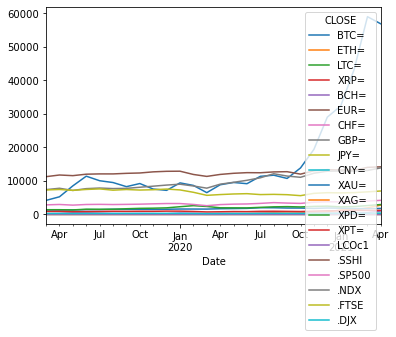

In [9]:
plt.figure(figsize=(10, 6))
ts.plot()
plt.show()

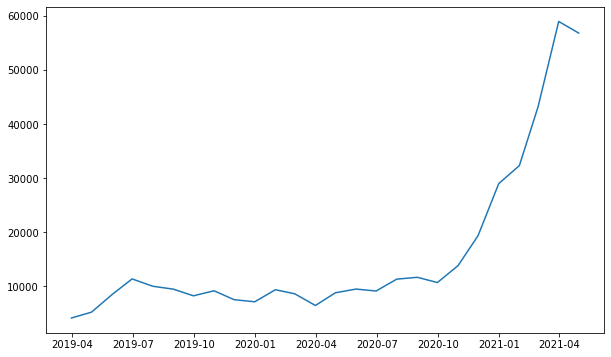

In [10]:
plt.figure(figsize=(10, 6))
plt.plot(ts['BTC='])
plt.show()

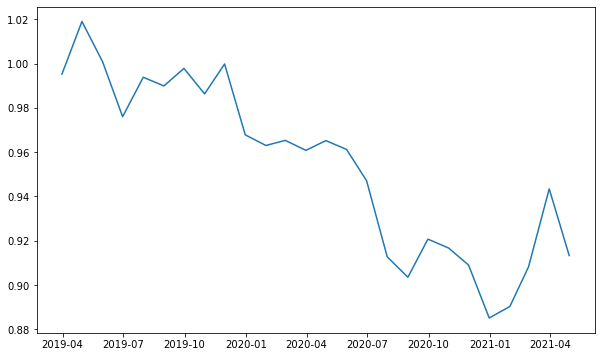

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(ts['CHF='])
plt.show()

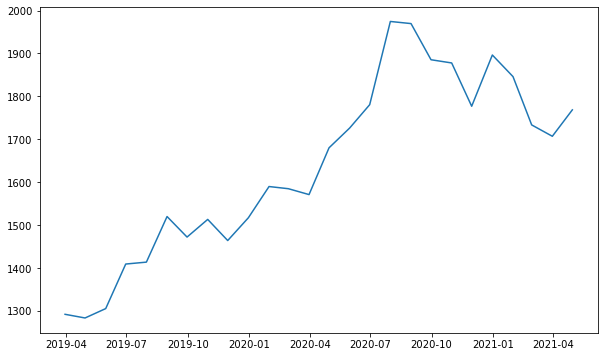

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(ts['XAU='])
plt.show()

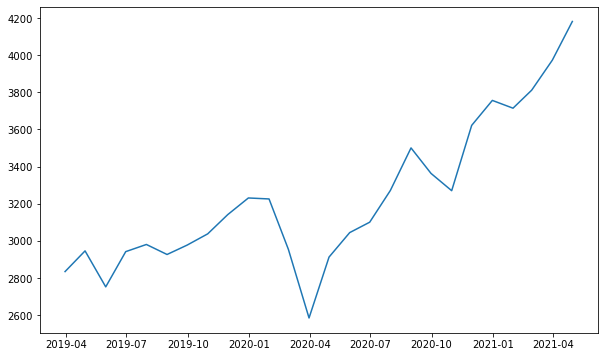

In [13]:
plt.figure(figsize=(10, 6))
plt.plot(ts['.SP500'])
plt.show()

In [14]:
desc_stat_table.to_excel('AQM.xlsx')

NameError: name 'desc_stat_table' is not defined

# Creating  a SQL Database with SQLite

In [ ]:
import sqlite3
from sqlite3 import Error

def create_connection(db_file):
    conn = None
    try:
        conn = sqlite3.connect(db_file)
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()
 
 
if __name__ == '__main__':
    create_connection(r"C:\Users\Lindy\Desktop\AQM_Crytocurrencies.db")
    


In [ ]:
conn = sqlite3.connect(r"C:\Users\Lindy\Desktop\AQM_Crytocurrencies.db")

print("Opened database successfully")

In [ ]:
# Create Table in using SQL and Python
conn = sqlite3.connect(r"C:\Users\Lindy\Desktop\AQM_Crytocurrencies.db")

conn.execute('''CREATE TABLE Cryptocurrencies
         (CLOSE_DATE TIMESTAMP,
         BTC INT NOT NULL,
         ETH INT NOT NULL,
         LTC INT NOT NULL,
         XRP INT NOT NULL,
         BCH INT NOT NULL,
         EUR INT NOT NULL,
         CHF INT NOT NULL,
         GBP INT NOT NULL,
         JPY INT NOT NULL,
         CNY INT NOT NULL,
         XAU INT NOT NULL,
         XAG INT NOT NULL,
         XPD INT NOT NULL,
         XPT INT NOT NULL,
         LCOc1 INT NOT NULL,
         SSHI INT NOT NULL,
         SP500 INT NOT NULL,
         NDX INT NOT NULL,
         FTSE INT NOT NULL,
         DJX INT NOT NULL);''')

print("Table created successfully")

In [ ]:
#uploading the data from the Cryptocurrencies Dataframe to the database

index1=ts.index.strftime('%Y-%m-%d %H-%M-%S')
ts.insert(0, 'CLOSE_DATE', index1)

records_to_insert = ts.values.tolist()
records_to_insert

c = conn.cursor()
c.executemany("INSERT INTO Cryptocurrencies(CLOSE_DATE, BTC, ETH, LTC, XRP, BCH, EUR, CHF, GBP, JPY, CNY, XAU, XAG, XPD, XPT, LCOc1, SSHI, SP500, NDX, FTSE, DJX) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)", records_to_insert)    
conn.commit()

# Normality tests

## Visual methods and Frequentist tests 

In [15]:
#Histograms for each individual series  

df=pd.DataFrame(ts)
df.dropna(axis='rows',inplace=True)

for col in df.iteritems(): 
    print('histogram'+col[0])
    fig, ax = plt.subplots()
    indicator=df[col[0]]
    ax.hist(indicator, alpha=0.9, color='blue',bins=20)
    plt.title(col[0])
    plt.savefig('Charts\Hist_'+col[0]+'.png')
    plt.close()

histogramBTC=
histogramETH=
histogramLTC=
histogramXRP=
histogramBCH=
histogramEUR=
histogramCHF=
histogramGBP=
histogramJPY=
histogramCNY=
histogramXAU=
histogramXAG=
histogramXPD=
histogramXPT=
histogramLCOc1
histogram.SSHI
histogram.SP500
histogram.NDX
histogram.FTSE
histogram.DJX


### Normality Test -  Visualizing the Data: Q-Q Plot

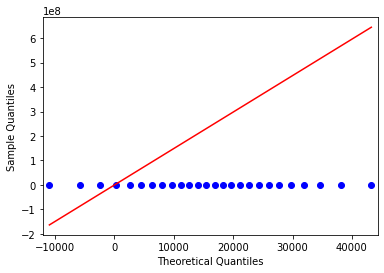

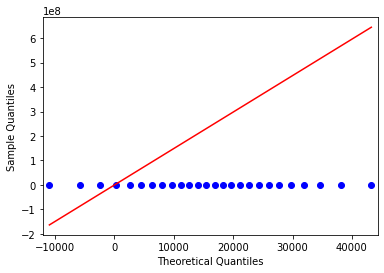

In [16]:
#Q-Q Plot for  Bitcoin

BTC=df['BTC=']

mean1=statistics.mean(BTC) 
st_dev1=statistics.stdev(BTC)
obs_count1=len(BTC)

sm.qqplot(BTC, loc = mean1, scale = st_dev1, line='s')

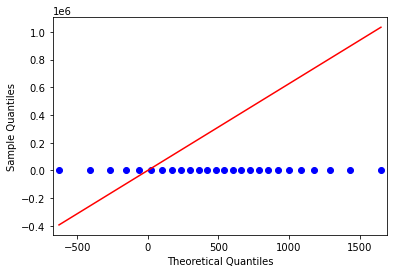

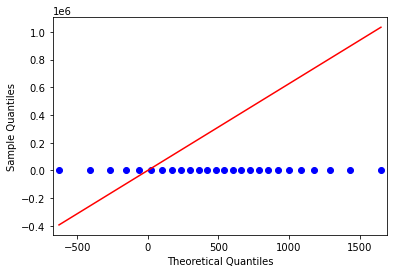

In [17]:
#Q-Q Plot for Ethereum

ETH=df['ETH=']

mean1=statistics.mean(ETH) 
st_dev1=statistics.stdev(ETH)
obs_count1=len(ETH)

sm.qqplot(ETH, loc = mean1, scale = st_dev1, line='s')

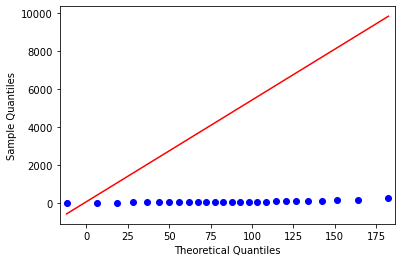

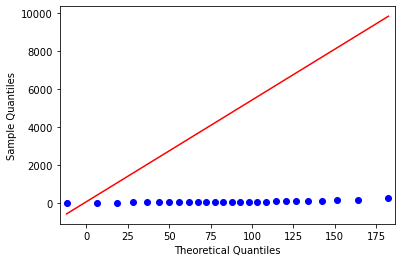

In [18]:
#Q-Q Plot for Litecoin

LTC=df['LTC=']

mean1=statistics.mean(LTC) 
st_dev1=statistics.stdev(LTC)
obs_count1=len(LTC)

sm.qqplot(LTC, loc = mean1, scale = st_dev1, line='s')

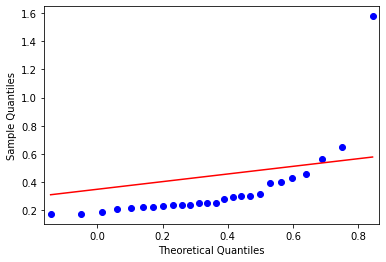

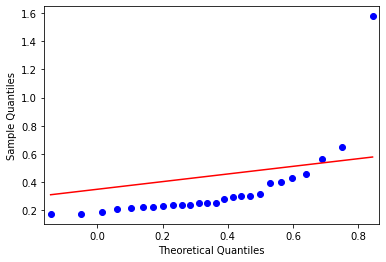

In [19]:
#Q-Q Plot for Ripple

XRP=df['XRP=']

mean1=statistics.mean(XRP) 
st_dev1=statistics.stdev(XRP)
obs_count1=len(XRP)

sm.qqplot(XRP, loc = mean1, scale = st_dev1, line='s')

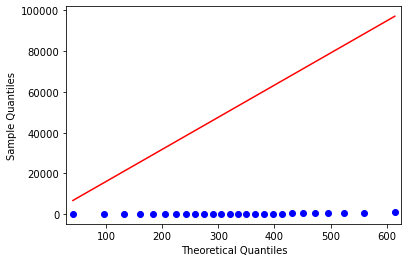

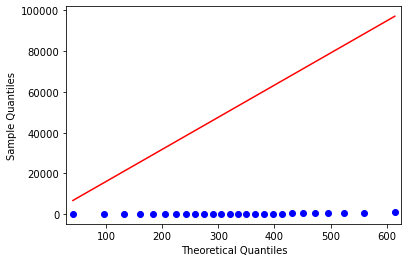

In [20]:
#Q-Q Plot for Bitcoin Cash

BCH=df['BCH=']

mean1=statistics.mean(BCH) 
st_dev1=statistics.stdev(BCH)
obs_count1=len(BCH)

sm.qqplot(BCH, loc = mean1, scale = st_dev1, line='s')

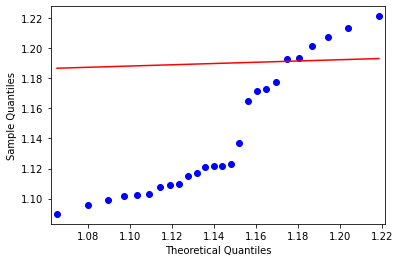

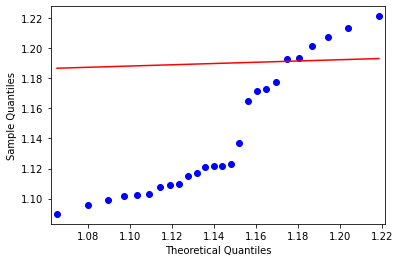

In [21]:
#Q-Q Plot for EUR

EUR=df['EUR=']

mean1=statistics.mean(EUR) 
st_dev1=statistics.stdev(EUR)
obs_count1=len(EUR)

sm.qqplot(EUR, loc = mean1, scale = st_dev1, line='s')

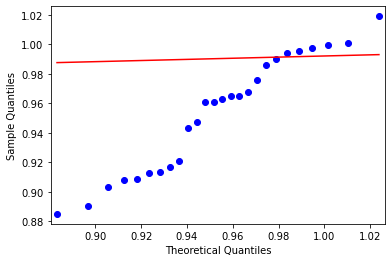

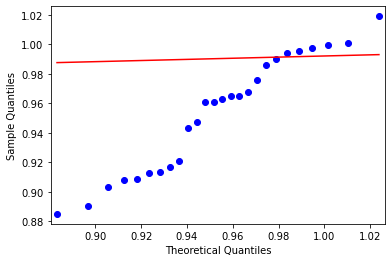

In [22]:
#Q-Q Plot for Swiss franc

CHF=df['CHF=']

mean1=statistics.mean(CHF) 
st_dev1=statistics.stdev(CHF)
obs_count1=len(CHF)

sm.qqplot(CHF, loc = mean1, scale = st_dev1, line='s')

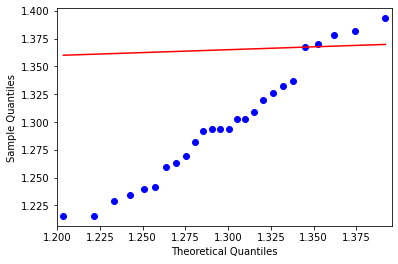

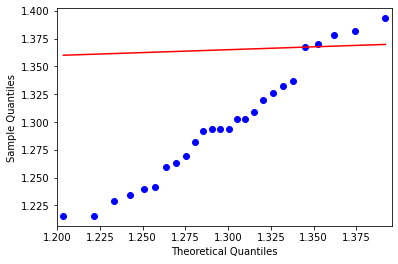

In [23]:
#Q-Q Plot for Poud Sterling

GBP=df['GBP=']

mean1=statistics.mean(GBP) 
st_dev1=statistics.stdev(GBP)
obs_count1=len(GBP)

sm.qqplot(GBP, loc = mean1, scale = st_dev1, line='s')

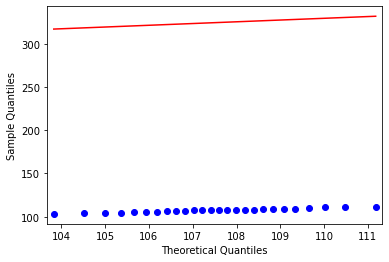

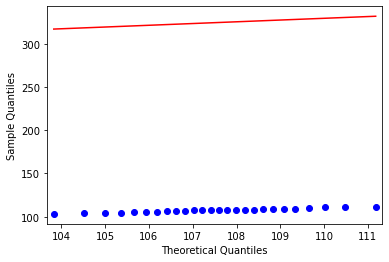

In [24]:
#Q-Q Plot for Japanese Yen

JPY=df['JPY=']

mean1=statistics.mean(JPY) 
st_dev1=statistics.stdev(JPY)
obs_count1=len(JPY)

sm.qqplot(JPY, loc = mean1, scale = st_dev1, line='s')

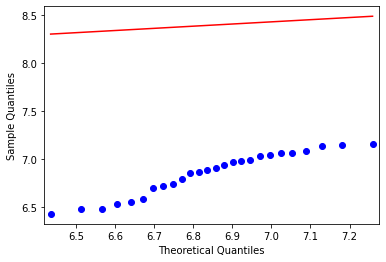

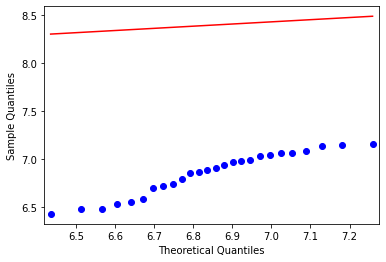

In [25]:
#Q-Q Plot for Yuan

CNY=df['CNY=']

mean1=statistics.mean(CNY) 
st_dev1=statistics.stdev(CNY)
obs_count1=len(CNY)

sm.qqplot(CNY, loc = mean1, scale = st_dev1, line='s')

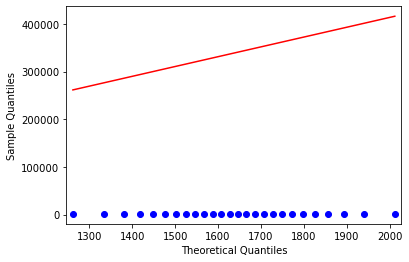

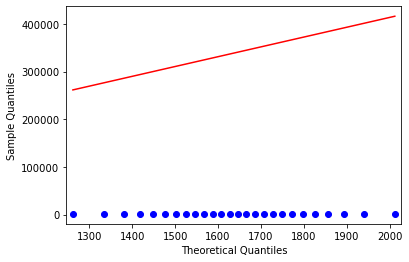

In [26]:
#Q-Q Plot for Gold

XAU=df['XAU=']

mean1=statistics.mean(XAU) 
st_dev1=statistics.stdev(XAU)
obs_count1=len(XAU)

sm.qqplot(XAU, loc = mean1, scale = st_dev1, line='s')

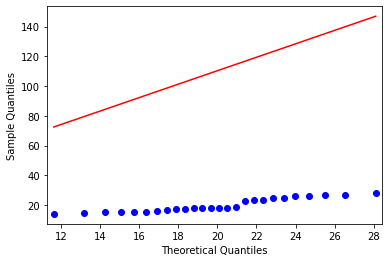

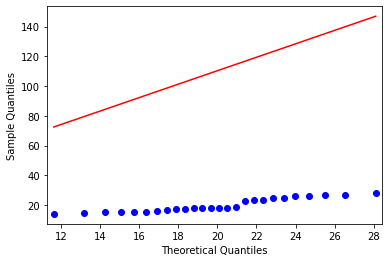

In [27]:
#Q-Q Plot for Silver

XAG=df['XAG=']

mean1=statistics.mean(XAG) 
st_dev1=statistics.stdev(XAG)
obs_count1=len(XAG)

sm.qqplot(XAG, loc = mean1, scale = st_dev1, line='s')

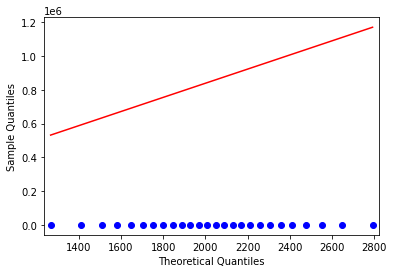

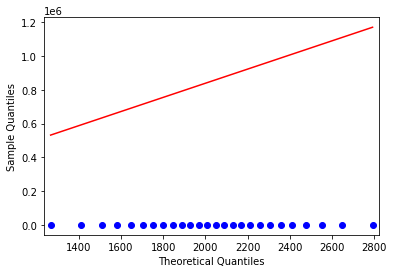

In [28]:
#Q-Q Plot for Palladium

XPD=df['XPD=']

mean1=statistics.mean(XPD) 
st_dev1=statistics.stdev(XPD)
obs_count1=len(XPD)

sm.qqplot(XPD, loc = mean1, scale = st_dev1, line='s')

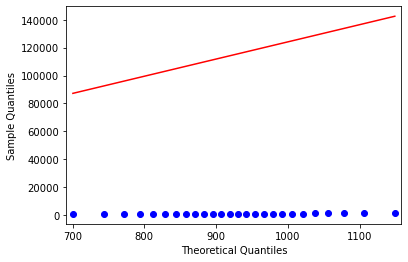

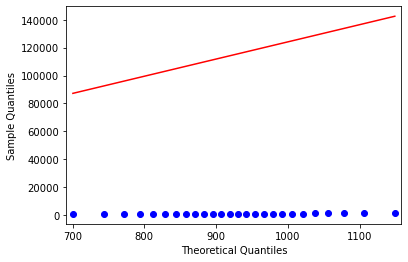

In [29]:
#Q-Q Plot for Platinum

XPT=df['XPT=']

mean1=statistics.mean(XPT) 
st_dev1=statistics.stdev(XPT)
obs_count1=len(XPT)

sm.qqplot(XPT, loc = mean1, scale = st_dev1, line='s')

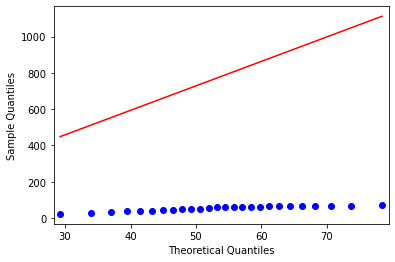

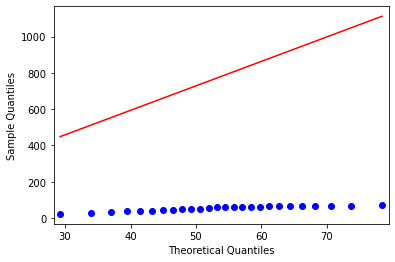

In [30]:
#Q-Q Plot for Brent Crude

LCOc1=df['LCOc1']

mean1=statistics.mean(LCOc1) 
st_dev1=statistics.stdev(LCOc1)
obs_count1=len(LCOc1)

sm.qqplot(LCOc1, loc = mean1, scale = st_dev1, line='s')

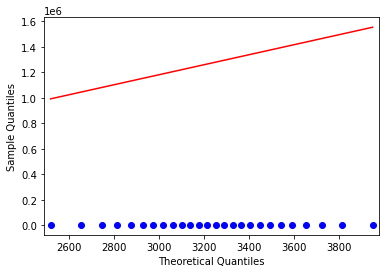

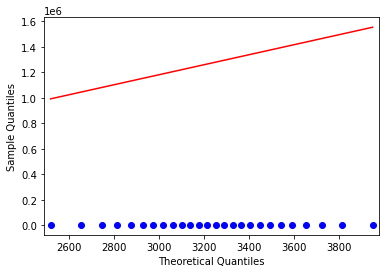

In [31]:
#Q-Q Plot for SP&500

SP500=df['.SP500']

mean1=statistics.mean(SP500) 
st_dev1=statistics.stdev(SP500)
obs_count1=len(SP500)

sm.qqplot(SP500, loc = mean1, scale = st_dev1, line='s')

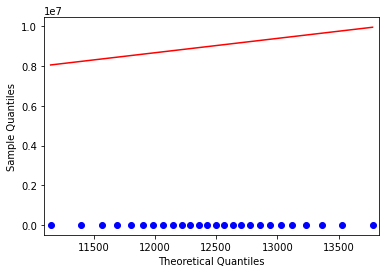

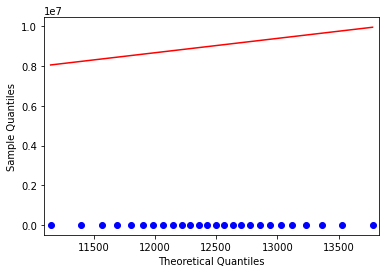

In [32]:
#Q-Q Plot for Swiss performance Index

SSHI=df['.SSHI']

mean1=statistics.mean(SSHI) 
st_dev1=statistics.stdev(SSHI)
obs_count1=len(SSHI)

sm.qqplot(SSHI, loc = mean1, scale = st_dev1, line='s')

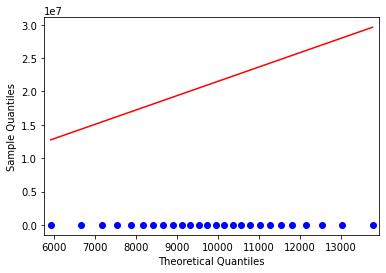

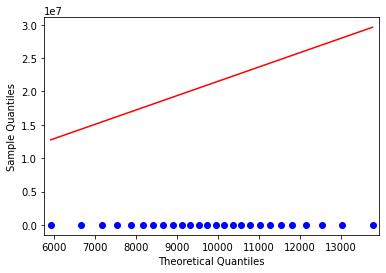

In [33]:
#Q-Q Plot for Nasdaq 100

NDX=df['.NDX']

mean1=statistics.mean(NDX) 
st_dev1=statistics.stdev(NDX)
obs_count1=len(NDX)

sm.qqplot(NDX, loc = mean1, scale = st_dev1, line='s')

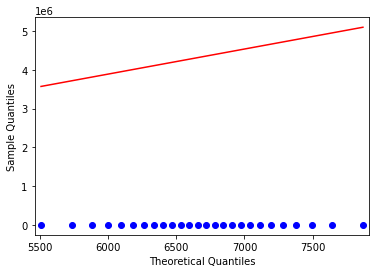

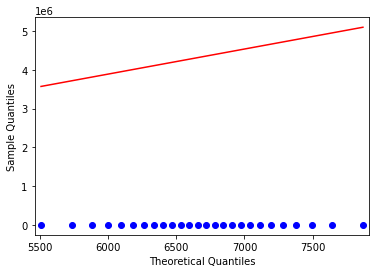

In [34]:
#Q-Q Plot for FTSE 100 index

FTSE=df['.FTSE']

mean1=statistics.mean(FTSE) 
st_dev1=statistics.stdev(FTSE)
obs_count1=len(FTSE)

sm.qqplot(FTSE, loc = mean1, scale = st_dev1, line='s')

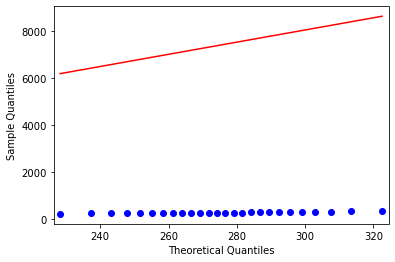

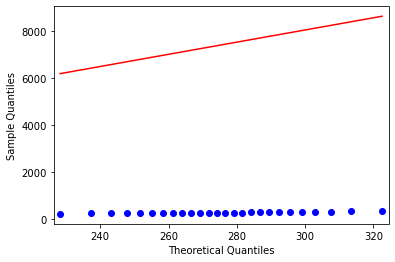

In [35]:
#Q-Q Plot for Dow Jones Index

DJX=df['.DJX']

mean1=statistics.mean(DJX) 
st_dev1=statistics.stdev(DJX)
obs_count1=len(DJX)

sm.qqplot(DJX, loc = mean1, scale = st_dev1, line='s')

### Normality Test - Visualizing the Data: Boxplot Plot

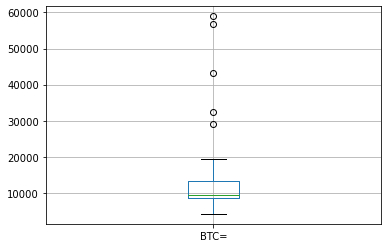

In [36]:
#boxplot for Bitcoin

boxplot1=df.boxplot(column=['BTC='])
plt.show()

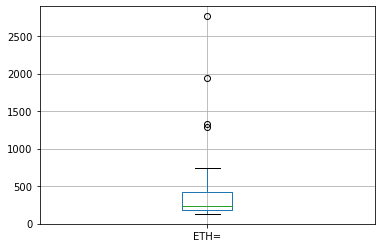

In [37]:
#boxplot for Ethereum

boxplot1=df.boxplot(column=['ETH='])
plt.show()

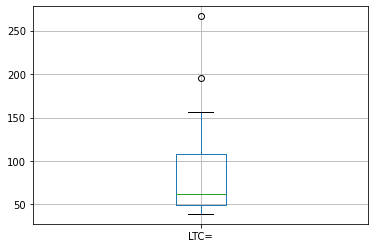

In [38]:
#boxplot for Litecoin

boxplot1=df.boxplot(column=['LTC='])
plt.show()

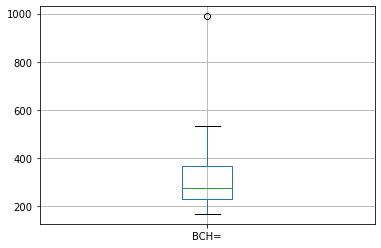

In [39]:
#boxplot for Bitcoin Cash

boxplot1=df.boxplot(column=['BCH='])
plt.show()

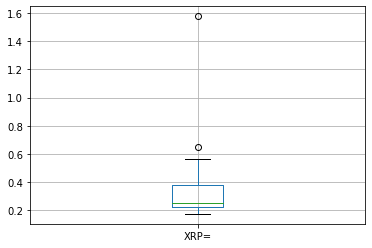

In [40]:
#boxplot for Ripple

boxplot1=df.boxplot(column=['XRP='])
plt.show()

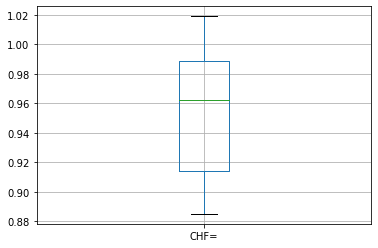

In [41]:
#boxplot for Swiss Franc

boxplot1=df.boxplot(column=['CHF='])
plt.show()

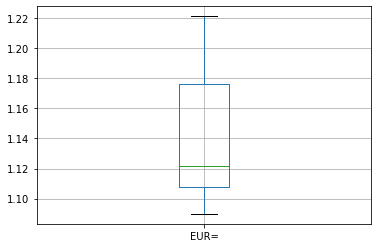

In [42]:
#boxplot for Euro

boxplot1=df.boxplot(column=['EUR='])
plt.show()

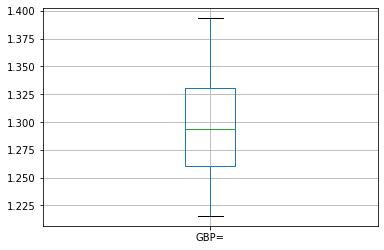

In [43]:
#boxplot for Pound Sterling

boxplot1=df.boxplot(column=['GBP='])
plt.show()

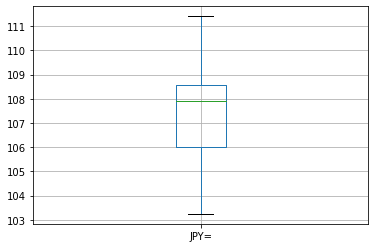

In [44]:
#boxplot for Japanese Yen

boxplot1=df.boxplot(column=['JPY='])
plt.show()

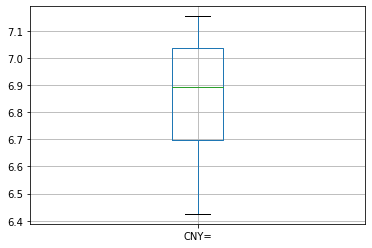

In [45]:
#boxplot for Yuan

boxplot1=df.boxplot(column=['CNY='])
plt.show()

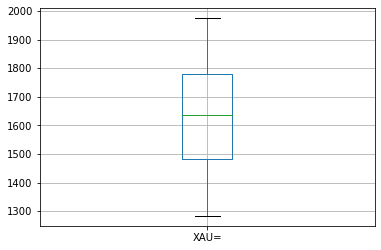

In [46]:
#boxplot for Gold 

boxplot1=df.boxplot(column=['XAU='])
plt.show()

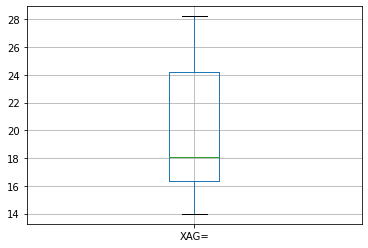

In [47]:
#boxplot for silver

boxplot1=df.boxplot(column=['XAG='])
plt.show()

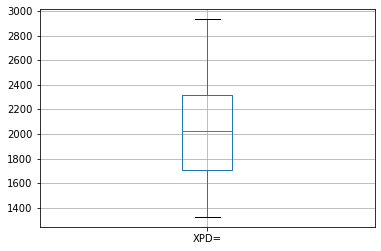

In [48]:
#boxplot for Palladium

boxplot1=df.boxplot(column=['XPD='])
plt.show()

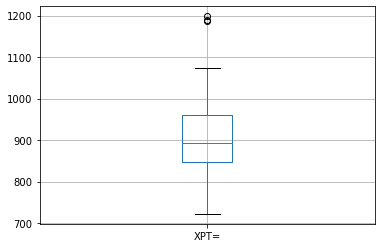

In [49]:
#boxplot for Platinum

boxplot1=df.boxplot(column=['XPT='])
plt.show()

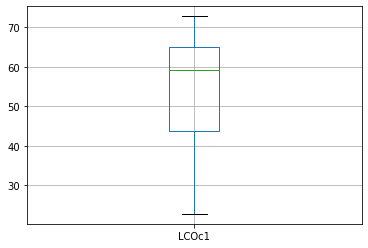

In [50]:
#boxplot for Brent Crude

boxplot1=df.boxplot(column=['LCOc1'])
plt.show()

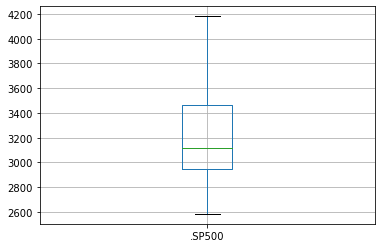

In [51]:
#boxplot for SP&500

boxplot1=df.boxplot(column=['.SP500'])
plt.show()

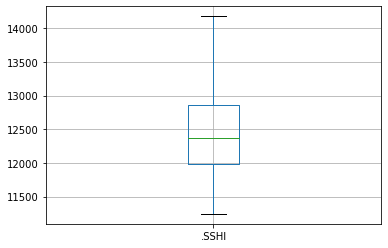

In [52]:
#boxplot for Swiss Performance Index

boxplot1=df.boxplot(column=['.SSHI'])
plt.show()

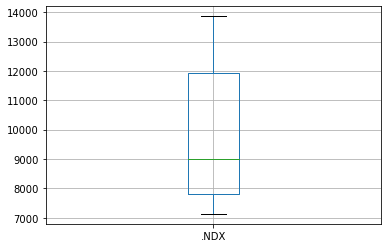

In [53]:
#boxplot for NASDAQ100 Index

boxplot1=df.boxplot(column=['.NDX'])
plt.show()

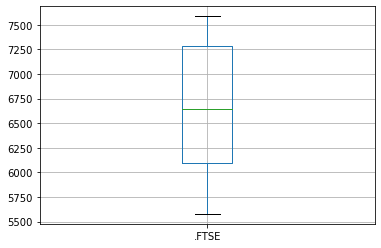

In [54]:
#boxplot for FTSE100 Index

boxplot1=df.boxplot(column=['.FTSE'])
plt.show()

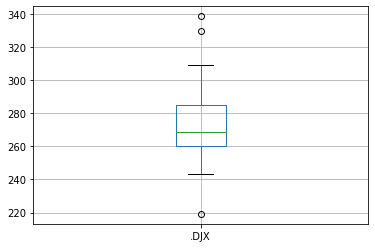

In [55]:
#boxplot for Dow Jones Index

boxplot1=df.boxplot(column=['.DJX'])
plt.show()

### Normality Test - Applying simple Statistics: Shapiro-Wilk Normality test

In [56]:
#Shapiro-Wilk Normality Test for Bitcoin

stat,p=sp.stats.shapiro(BTC)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
1.6578488839513739e-06
Sample does not look Gaussian (reject H0)


In [57]:
#Shapiro-Wilk Normality Test for Ethereum

stat,p=sp.stats.shapiro(ETH)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
5.415103601080773e-07
Sample does not look Gaussian (reject H0)


In [58]:
#Shapiro-Wilk Normality Test for Litecoin

stat,p=sp.stats.shapiro(LTC)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
5.028044688515365e-05
Sample does not look Gaussian (reject H0)


In [59]:
#Shapiro-Wilk Normality Test for Bitcoin Cash

stat,p=sp.stats.shapiro(BCH)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
4.141684257774614e-06
Sample does not look Gaussian (reject H0)


In [60]:
#Shapiro-Wilk Normality Test for Ripple

stat,p=sp.stats.shapiro(XRP)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
7.064735285666757e-08
Sample does not look Gaussian (reject H0)


In [61]:
#Shapiro-Wilk Normality Test for Swiss franc

stat,p=sp.stats.shapiro(CHF)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.10511621087789536
Sample looks Gaussian (fail to reject H0)


In [62]:
#Shapiro-Wilk Normality Test for Euro

stat,p=sp.stats.shapiro(EUR)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.0035959696397185326
Sample does not look Gaussian (reject H0)


In [63]:
#Shapiro-Wilk Normality Test for Pound Sterling

stat,p=sp.stats.shapiro(GBP)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.35193005204200745
Sample looks Gaussian (fail to reject H0)


In [64]:
#Shapiro-Wilk Normality Test for Japanese Yen

stat,p=sp.stats.shapiro(JPY)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.7336047291755676
Sample looks Gaussian (fail to reject H0)


In [65]:
#Shapiro-Wilk Normality Test for Yuan

stat,p=sp.stats.shapiro(CNY)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.05593828111886978
Sample looks Gaussian (fail to reject H0)


In [66]:
#Shapiro-Wilk Normality Test for Gold

stat,p=sp.stats.shapiro(XAU)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.32188931107521057
Sample looks Gaussian (fail to reject H0)


In [67]:
#Shapiro-Wilk Normality Test for Silver

stat,p=sp.stats.shapiro(XAG)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.006496665067970753
Sample does not look Gaussian (reject H0)


In [68]:
#Shapiro-Wilk Normality Test for Palladium

stat,p=sp.stats.shapiro(XPD)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.5197241306304932
Sample looks Gaussian (fail to reject H0)


In [69]:
#Shapiro-Wilk Normality Test for Platinum

stat,p=sp.stats.shapiro(XPT)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.015389838255941868
Sample does not look Gaussian (reject H0)


In [70]:
#Shapiro-Wilk Normality Test for Brent Crude

stat,p=sp.stats.shapiro(LCOc1)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.03460490331053734
Sample does not look Gaussian (reject H0)


In [71]:
#Shapiro-Wilk Normality Test for SP&500

stat,p=sp.stats.shapiro(SP500)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.086578369140625
Sample looks Gaussian (fail to reject H0)


In [72]:
#Shapiro-Wilk Normality Test for Swiss Performance Index

stat,p=sp.stats.shapiro(SSHI)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.538510799407959
Sample looks Gaussian (fail to reject H0)


In [73]:
#Shapiro-Wilk Normality Test for NASDAQ100 Index

stat,p=sp.stats.shapiro(NDX)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.0061914557591080666
Sample does not look Gaussian (reject H0)


#Shapiro-Wilk Normality Test for FTSE 100 Index

stat,p=sp.stats.shapiro(FTSE)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

In [74]:
#Shapiro-Wilk Normality Test for Dow Jones

stat,p=sp.stats.shapiro(DJX)

print("p-value for Shapiro-Wilk: ")
print(p)

alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

p-value for Shapiro-Wilk: 
0.3285483717918396
Sample looks Gaussian (fail to reject H0)


### Normality Test - Applying simple Statistics: Mean, Median, Skewness and Kurtosis.

Skew: 1.8903462832454339
Mean: 16158.065000000002
Median: 9497.86
Excess kurtosis of returns:  2.317254741369866


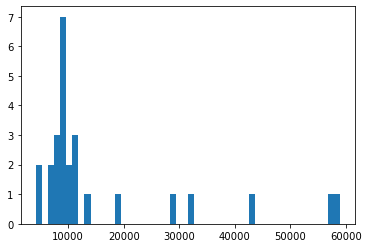

In [75]:
# Calculating Mean, Median, Skewness and kurtosis for Bitcoin

print('Skew:',stats.skew(BTC))
print('Mean:', np.mean(BTC))
print('Median:', np.median(BTC))
print("Excess kurtosis of returns: ", stats.kurtosis(BTC))

plt.hist(BTC, 50);

Skew: 2.3295483866983804
Mean: 510.89153846153846
Median: 230.425
Excess kurtosis of returns:  4.768827605626535


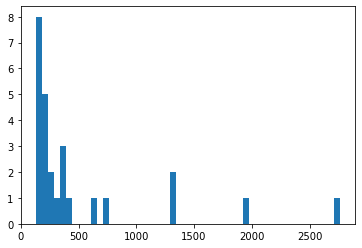

In [76]:
# Calculating Mean, Median, Skewness and kurtosis for Ethereum

print('Skew:',stats.skew(ETH))
print('Mean:', np.mean(ETH))
print('Median:', np.median(ETH))
print("Excess kurtosis of returns: ", stats.kurtosis(ETH))

plt.hist(ETH, 50);

Skew: 1.8337947691397982
Mean: 85.2073076923077
Median: 61.535
Excess kurtosis of returns:  3.109018233935676


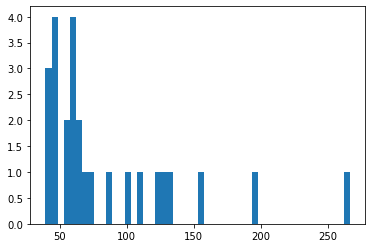

In [77]:
# Calculating Mean, Median, Skewness and kurtosis for Litecoin

print('Skew:',stats.skew(LTC))
print('Mean:', np.mean(LTC))
print('Median:', np.median(LTC))
print("Excess kurtosis of returns: ", stats.kurtosis(LTC))

plt.hist(LTC, 50);

Skew: 2.8430357598140823
Mean: 327.63153846153847
Median: 278.42
Excess kurtosis of returns:  9.23033468247401


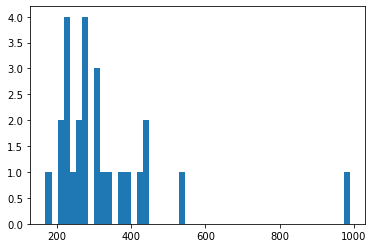

In [78]:
# Calculating Mean, Median, Skewness and kurtosis for Bitcoin Cash

print('Skew:',stats.skew(BCH))
print('Mean:', np.mean(BCH))
print('Median:', np.median(BCH))
print("Excess kurtosis of returns: ", stats.kurtosis(BCH))

plt.hist(BCH, 50);

Skew: 3.573585668363583
Mean: 0.3503296153846154
Median: 0.2544
Excess kurtosis of returns:  13.232773377170485


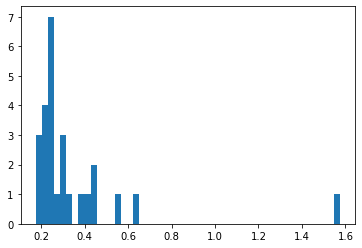

In [79]:
# Calculating Mean, Median, Skewness and kurtosis for Ripple

print('Skew:',stats.skew(XRP))
print('Mean:', np.mean(XRP))
print('Median:', np.median(XRP))
print("Excess kurtosis of returns: ", stats.kurtosis(XRP))

plt.hist(XRP, 50);

Skew: -0.19334532871545138
Mean: 0.9535346153846155
Median: 0.9621
Excess kurtosis of returns:  -1.2341672290531627


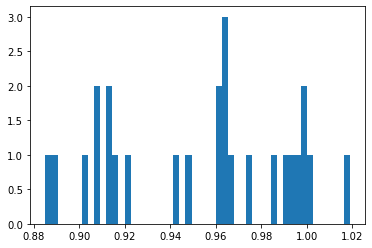

In [80]:
# Calculating Mean, Median, Skewness and kurtosis for Swiss Franc

print('Skew:',stats.skew(CHF))
print('Mean:', np.mean(CHF))
print('Median:', np.median(CHF))
print("Excess kurtosis of returns: ", stats.kurtosis(CHF))

plt.hist(CHF, 50);

Skew: 0.5479657430707624
Mean: 1.1419461538461535
Median: 1.1216
Excess kurtosis of returns:  -1.2407157207184936


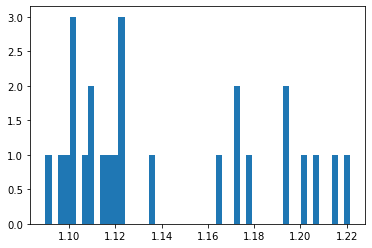

In [81]:
# Calculating Mean, Median, Skewness and kurtosis for Euro

print('Skew:',stats.skew(EUR))
print('Mean:', np.mean(EUR))
print('Median:', np.median(EUR))
print("Excess kurtosis of returns: ", stats.kurtosis(EUR))

plt.hist(EUR, 50);

Skew: 0.1754832936350026
Mean: 1.2977884615384616
Median: 1.29405
Excess kurtosis of returns:  -0.9259002630577418


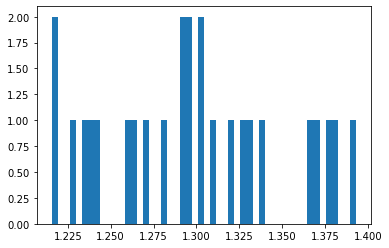

In [82]:
# Calculating Mean, Median, Skewness and kurtosis for Pound Sterling

print('Skew:',stats.skew(GBP))
print('Mean:', np.mean(GBP))
print('Median:', np.median(GBP))
print("Excess kurtosis of returns: ", stats.kurtosis(GBP))

plt.hist(GBP, 50);

Skew: -0.13427402260096938
Mean: 107.50230769230767
Median: 107.9
Excess kurtosis of returns:  -0.45341100378077304


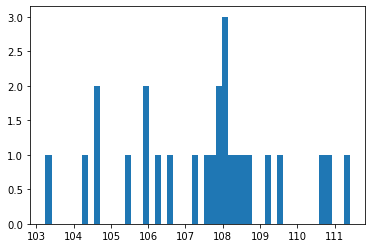

In [83]:
# Calculating Mean, Median, Skewness and kurtosis for Japanese Yen

print('Skew:',stats.skew(JPY))
print('Mean:', np.mean(JPY))
print('Median:', np.median(JPY))
print("Excess kurtosis of returns: ", stats.kurtosis(JPY))

plt.hist(JPY, 50);

Skew: -0.4442673388957817
Mean: 6.847084615384618
Median: 6.893000000000001
Excess kurtosis of returns:  -1.080014497596558


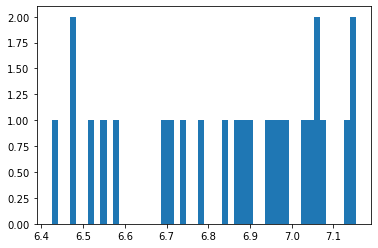

In [84]:
# Calculating Mean, Median, Skewness and kurtosis for Yuan

print('Skew:',stats.skew(CNY))
print('Mean:', np.mean(CNY))
print('Median:', np.median(CNY))
print("Excess kurtosis of returns: ", stats.kurtosis(CNY))

plt.hist(CNY, 50);

Skew: -0.08138293918163983
Mean: 1636.8555269230767
Median: 1634.95245
Excess kurtosis of returns:  -1.086068802286317


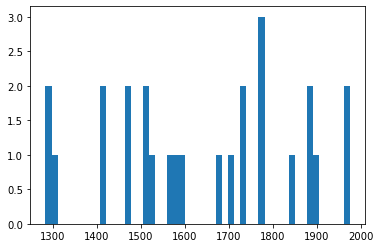

In [85]:
# Calculating Mean, Median, Skewness and kurtosis for Gold

print('Skew:',stats.skew(XAU))
print('Mean:', np.mean(XAU))
print('Median:', np.median(XAU))
print("Excess kurtosis of returns: ", stats.kurtosis(XAU))

plt.hist(XAU, 50);

Skew: 0.4546889073789738
Mean: 19.8646
Median: 18.07815
Excess kurtosis of returns:  -1.307606003435143


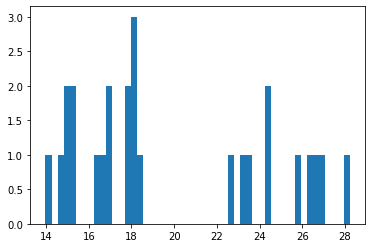

In [86]:
# Calculating Mean, Median, Skewness and kurtosis for Silver

print('Skew:',stats.skew(XAG))
print('Mean:', np.mean(XAG))
print('Median:', np.median(XAG))
print("Excess kurtosis of returns: ", stats.kurtosis(XAG))

plt.hist(XAG, 50);

Skew: 0.017044317139361366
Mean: 2029.1947461538464
Median: 2025.5066000000002
Excess kurtosis of returns:  -0.7763133772353976


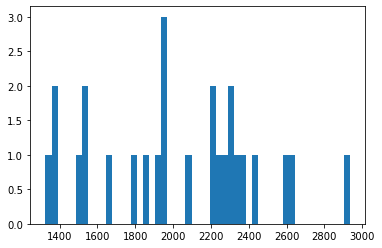

In [87]:
# Calculating Mean, Median, Skewness and kurtosis for Palladium

print('Skew:',stats.skew(XPD))
print('Mean:', np.mean(XPD))
print('Median:', np.median(XPD))
print("Excess kurtosis of returns: ", stats.kurtosis(XPD))

plt.hist(XPD, 50);

Skew: 0.9173323570453915
Mean: 924.7699499999999
Median: 894.16965
Excess kurtosis of returns:  0.17258689077490796


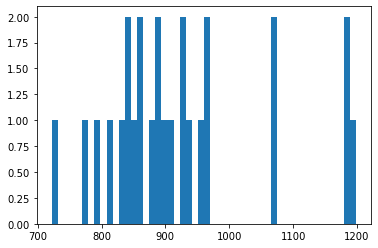

In [88]:
# Calculating Mean, Median, Skewness and kurtosis for Platinum

print('Skew:',stats.skew(XPT))
print('Mean:', np.mean(XPT))
print('Median:', np.median(XPT))
print("Excess kurtosis of returns: ", stats.kurtosis(XPT))

plt.hist(XPT, 50);

Skew: -0.7366585787193995
Mean: 53.83153846153846
Median: 59.19499999999999
Excess kurtosis of returns:  -0.4626019304134954


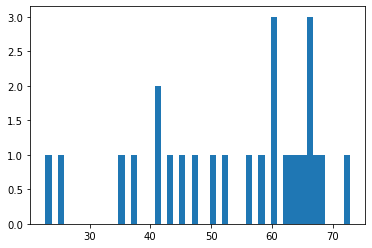

In [89]:
# Calculating Mean, Median, Skewness and kurtosis for Brent Crude

print('Skew:',stats.skew(LCOc1))
print('Mean:', np.mean(LCOc1))
print('Median:', np.median(LCOc1))
print("Excess kurtosis of returns: ", stats.kurtosis(LCOc1))

plt.hist(LCOc1, 50);

Skew: 0.7365769389183064
Mean: 3232.687038461539
Median: 3120.63285
Excess kurtosis of returns:  -0.2765975630893034


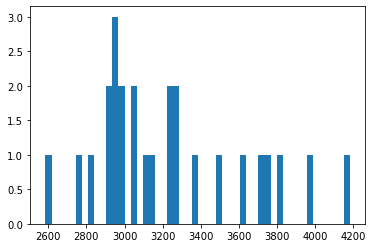

In [90]:
# Calculating Mean, Median, Skewness and kurtosis for SP&500

print('Skew:',stats.skew(SP500))
print('Mean:', np.mean(SP500))
print('Median:', np.median(SP500))
print("Excess kurtosis of returns: ", stats.kurtosis(SP500))

plt.hist(SP500, 50);

Skew: 0.5392700662087385
Mean: 12462.372307692307
Median: 12372.22
Excess kurtosis of returns:  -0.02469967426513131


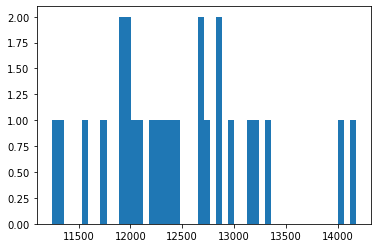

In [91]:
# Calculating Mean, Median, Skewness and kurtosis for Swiss Performance Index

print('Skew:',stats.skew(SSHI))
print('Mean:', np.mean(SSHI))
print('Median:', np.median(SSHI))
print("Excess kurtosis of returns: ", stats.kurtosis(SSHI))

plt.hist(SSHI, 50);

Skew: 0.4467807872360193
Mean: 9841.539076923076
Median: 8996.0105
Excess kurtosis of returns:  -1.3270827675796855


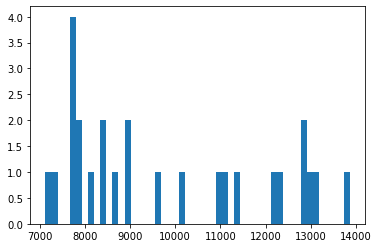

In [92]:
# Calculating Mean, Median, Skewness and kurtosis for NASDAQ 100 Index

print('Skew:',stats.skew(NDX))
print('Mean:', np.mean(NDX))
print('Median:', np.median(NDX))
print("Excess kurtosis of returns: ", stats.kurtosis(NDX))

plt.hist(NDX, 50);

Skew: -0.16945651512688506
Mean: 6689.082307692307
Median: 6647.12
Excess kurtosis of returns:  -1.4499182092321414


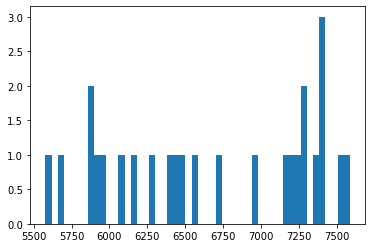

In [93]:
# Calculating Mean, Median, Skewness and kurtosis for FTSE 100 Index

print('Skew:',stats.skew(FTSE))
print('Mean:', np.mean(FTSE))
print('Median:', np.median(FTSE))
print("Excess kurtosis of returns: ", stats.kurtosis(FTSE))

plt.hist(FTSE, 50);

Skew: 0.539959960076921
Mean: 275.39961538461534
Median: 268.905
Excess kurtosis of returns:  0.4197283617440255


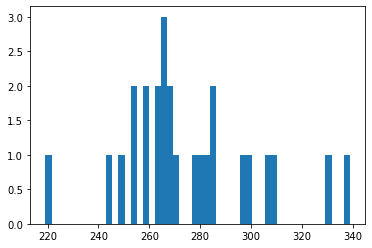

In [94]:
# Calculating Mean, Median, Skewness and kurtosis for Dow Jones Index

print('Skew:',stats.skew(DJX))
print('Mean:', np.mean(DJX))
print('Median:', np.median(DJX))
print("Excess kurtosis of returns: ", stats.kurtosis(DJX))

plt.hist(DJX, 50);

### Normality Test - Applying simple Statistics: Jarque Bera Test

In [95]:
#Normality Testing using Jarque-Bera 
#Test Calibration

N = 1000
M = 1000

pvalues = np.ndarray((N))

for i in range(N):
    # Draw M samples from a normal distribution 
    X = np.random.normal(0, 1, M);
    _, pvalue, _, _ = jarque_bera(X)
    pvalues[i] = pvalue
    
# count number of pvalues below our default 0.05 cutoff
num_significant = len(pvalues[pvalues < 0.05])

print ((num_significant) / N)

0.053


In [96]:
#Jarque-Bera for Bitcoin

_, pvalue, _, _ = jarque_bera(BTC)

if pvalue > 0.05:
    print ('The BTC Closing Prices are likely normal.')
else:
    print ('The BTC Closing Prices are likely not normal.')

The BTC Closing Prices are likely not normal.


#This tells us that the BTC Closing Prices likely do not follow a normal distribution.

In [97]:
#Jarque-Bera for Ethereum

_, pvalue, _, _ = jarque_bera(ETH)

if pvalue > 0.05:
    print ('The ETH Closing Prices are likely normal.')
else:
    print ('The ETH Closing Prices are likely not normal.')

The ETH Closing Prices are likely not normal.


In [98]:
#Jarque-Bera for Litecoin

_, pvalue, _, _ = jarque_bera(LTC)

if pvalue > 0.05:
    print ('The LTC Closing Prices are likely normal.')
else:
    print ('The LTC Closing Prices are likely not normal.')

The LTC Closing Prices are likely not normal.


In [99]:
#Jarque-Bera for Bitcoin Cash

_, pvalue, _, _ = jarque_bera(BCH)

if pvalue > 0.05:
    print ('The BCH Closing Prices are likely normal.')
else:
    print ('The BCH Closing Prices are likely not normal.')

The BCH Closing Prices are likely not normal.


In [100]:
#Jarque-Bera for Ripple

_, pvalue, _, _ = jarque_bera(XRP)

if pvalue > 0.05:
    print ('The XRP Closing Prices are likely normal.')
else:
    print ('The XRP Closing Prices are likely not normal.')

The XRP Closing Prices are likely not normal.


In [101]:
#Normality Testing using Jarque-Bera for Swiss Franc
_, pvalue, _, _ = jarque_bera(CHF)

if pvalue > 0.05:
    print ('The CHF Closing Prices are likely normal.')
else:
    print ('The CHF Closing Prices are likely not normal.')

The CHF Closing Prices are likely normal.


In [102]:
#Normality Testing using Jarque-Bera for Euro
_, pvalue, _, _ = jarque_bera(EUR)

if pvalue > 0.05:
    print ('The EUR Closing Prices are likely normal.')
else:
    print ('The EUR Closing Prices are likely not normal.')

The EUR Closing Prices are likely normal.


In [103]:
#Normality Testing using Jarque-Bera for Pound Sterling
_, pvalue, _, _ = jarque_bera(GBP)

if pvalue > 0.05:
    print ('The GBP Closing Prices are likely normal.')
else:
    print ('The GBP Closing Prices are likely not normal.')

The GBP Closing Prices are likely normal.


In [104]:
#Normality Testing using Jarque-Bera for Japanese Yen
_, pvalue, _, _ = jarque_bera(JPY)

if pvalue > 0.05:
    print ('The JPY Closing Prices are likely normal.')
else:
    print ('The JPY Closing Prices are likely not normal.')

The JPY Closing Prices are likely normal.


In [105]:
#Normality Testing using Jarque-Bera for Yuan
_, pvalue, _, _ = jarque_bera(CNY)

if pvalue > 0.05:
    print ('The CNY Closing Prices are likely normal.')
else:
    print ('The CNY Closing Prices are likely not normal.')

The CNY Closing Prices are likely normal.


In [106]:
#Normality Testing using Jarque-Bera for SP&500
_, pvalue, _, _ = jarque_bera(SP500)

if pvalue > 0.05:
    print ('The SP&500 Closing Prices are likely normal.')
else:
    print ('The SP&500 Closing Prices are likely not normal.')

The SP&500 Closing Prices are likely normal.


In [107]:
#Normality Testing using Jarque-Bera for Swiss Performance Index
_, pvalue, _, _ = jarque_bera(SSHI)

if pvalue > 0.05:
    print ('The SSHI Closing Prices are likely normal.')
else:
    print ('The SSHI Closing Prices are likely not normal.')

The SSHI Closing Prices are likely normal.


In [108]:
#Normality Testing using Jarque-Bera for NASDAQ 100 Index
_, pvalue, _, _ = jarque_bera(NDX)

if pvalue > 0.05:
    print ('The NDX Closing Prices are likely normal.')
else:
    print ('The NDX Closing Prices are likely not normal.')

The NDX Closing Prices are likely normal.


In [109]:
#Normality Testing using Jarque-Bera for Dow Jones Index
_, pvalue, _, _ = jarque_bera(DJX)

if pvalue > 0.05:
    print ('The DJX Closing Prices are likely normal.')
else:
    print ('The DJX Closing Prices are likely not normal.')

The DJX Closing Prices are likely normal.


# Exporting results to the SQL Database

# Dividing the data in four subperiods and calculating the descriptive statistics for each of them

In [110]:
sample_1=ts[0:7]
sample_2=ts[7:13] 
sample_3=ts[13:19] 
sample_4=ts[19:26] 


In [111]:
sample_1

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,1291.90,15.1350,1383.500,845.50,68.39,11241.19,2834.3998,7378.771,7279.19,259.29
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,1283.35,14.9350,1388.000,886.00,72.80,11735.16,2945.8309,7781.456,7418.22,265.93
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,1305.25,14.5700,1325.000,791.50,64.49,11544.54,2752.0629,7127.956,7161.71,248.15
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,1409.10,15.3075,1538.000,833.00,66.55,11977.38,2941.7606,7671.075,7425.63,266.00
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,1413.55,16.2550,1516.500,859.50,65.17,12064.45,2980.3789,7848.780,7586.78,268.64
2019-08-31,9487.80,166.57,62.49,0.25446,273.20,1.0989,0.9899,1.2156,106.29,7.1543,1519.85,18.3500,1531.250,930.75,60.43,12060.92,2926.4581,7690.998,7207.18,264.03
2019-09-30,8260.00,176.92,55.47,0.25285,225.83,1.0898,0.9978,1.2287,108.06,7.1477,1472.00,16.9950,1674.505,882.00,60.78,12233.13,2976.7373,7749.449,7408.21,269.17


In [112]:
sample_2

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-10-31,9190.79,181.45,58.35,0.29447,282.47,1.1150,0.9863,1.2940,108.02,7.0379,1513.1600,18.1250,1794.0649,932.0000,60.23,12337.05,3037.5644,8083.832,7248.38,270.46
2019-11-30,7544.95,150.88,47.57,0.22466,216.41,1.1015,0.9998,1.2933,109.51,7.0308,1463.9000,17.0200,1841.1949,900.0200,62.43,12676.11,3140.9806,8403.685,7346.53,280.51
2019-12-31,7157.75,128.24,41.15,0.19025,202.92,1.1210,0.9678,1.3259,108.61,6.9618,1517.0100,17.8300,1941.5000,962.5000,66.00,12837.50,3230.7820,8733.073,7542.44,285.38
2020-01-31,9383.80,180.37,67.90,0.23850,375.06,1.1093,0.9630,1.3199,108.38,6.9364,1589.8149,18.0313,2278.0400,956.5000,58.16,12870.99,3225.5163,8991.512,7286.01,282.56
2020-02-29,8634.11,223.57,58.69,0.23392,309.46,1.1025,0.9653,1.2820,108.07,6.9906,1584.7400,16.6615,2593.1921,863.5950,50.52,11897.75,2954.2237,8461.834,6580.61,254.09
2020-03-31,6474.10,134.35,39.12,0.17768,221.92,1.1029,0.9608,1.2418,107.53,7.0808,1571.0500,13.9700,2351.5200,722.1662,22.74,11319.54,2584.5908,7813.499,5671.96,219.17


In [113]:
sample_3

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2020-04-30,8822.59,211.53,47.07,0.21459,254.27,1.0955,0.9652,1.2592,107.17,7.0600,1680.0900,15.02,1959.9331,772.1862,25.27,11905.85,2912.4305,9000.509,5901.21,243.46
2020-05-31,9507.92,235.46,46.50,0.20791,243.77,1.1098,0.9612,1.2344,107.77,7.1348,1726.3000,17.84,1944.5000,838.2500,35.33,12246.05,3044.3052,9555.525,6076.60,253.83
2020-06-30,9144.25,225.39,41.12,0.17579,221.70,1.1231,0.9471,1.2399,107.92,7.0651,1780.6650,18.13,1930.0000,816.6080,41.15,12436.03,3100.2851,10156.852,6169.74,258.13
2020-07-31,11340.25,345.58,58.33,0.25434,302.25,1.1774,0.9127,1.3088,105.88,6.9744,1974.6900,24.37,2091.0801,907.0000,43.30,12407.39,3271.1249,10905.881,5897.76,264.28
2020-08-31,11680.47,432.57,60.88,0.28019,274.37,1.1936,0.9035,1.3369,105.89,6.8474,1969.7500,28.22,2243.0977,929.5859,45.28,12658.85,3500.3085,12110.698,5963.57,284.30
2020-09-30,10711.50,356.65,45.83,0.23900,225.86,1.1718,0.9207,1.2916,105.45,6.7896,1885.4399,23.21,2304.8528,888.3193,40.95,12724.65,3362.9990,11418.063,5866.10,277.82


In [114]:
sample_4

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2020-10-31,13840.00,387.35,55.91,0.24016,262.99,1.1647,0.9167,1.2941,104.64,6.6919,1877.9500,23.6300,2212.0000,849.0000,37.46,11994.43,3269.9591,11052.946,5577.27,265.02
2020-11-30,19376.24,605.47,86.54,0.64757,313.94,1.1928,0.9090,1.3321,104.27,6.5760,1777.0190,22.6044,2372.8130,964.8914,47.59,13003.41,3621.6334,12268.316,6266.19,296.39
2020-12-31,28987.60,738.87,124.07,0.22464,343.04,1.2213,0.8851,1.3673,103.24,6.5250,1896.4875,26.3584,2447.6599,1065.9478,51.80,13327.88,3756.0715,12888.284,6460.52,306.06
2021-01-31,32321.40,1290.53,126.38,0.45563,392.72,1.2136,0.8903,1.3702,104.68,6.4250,1846.0900,27.0015,2226.0405,1072.6758,55.88,13192.93,3714.2427,12925.376,6407.46,299.83
2021-02-28,43177.77,1329.46,156.02,0.39801,437.68,1.2074,0.9082,1.3932,106.58,6.4730,1733.4900,26.6200,2317.1780,1188.7222,66.13,13134.38,3811.1497,12909.443,6483.43,309.32
2021-03-31,58950.02,1939.87,195.70,0.56430,535.81,1.1728,0.9434,1.3779,110.70,6.5518,1707.0074,24.3900,2619.1414,1187.3009,63.54,14015.01,3972.8922,13091.443,6713.63,329.82
2021-04-30,56802.90,2765.21,266.53,1.57572,989.20,1.2018,0.9133,1.3814,109.27,6.4730,1768.5900,25.9000,2934.5000,1198.5000,67.25,14179.11,4181.1749,13860.760,6969.81,338.75


In [115]:
def nans(shape, dtype=float):
    a = np.empty(shape, dtype)
    a.fill(np.nan)
    return a

### Descriptive Statistics: Calculating the mean of each subperiod

In [116]:
subsample_list=['AVERAGE CLOSING PRICE','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([20,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [117]:
desc_stat_table.iloc[0, 0]= 'BTC='
desc_stat_table.iloc[1, 0]= 'ETH='
desc_stat_table.iloc[2, 0]= 'LTC='
desc_stat_table.iloc[3, 0]= 'XRP='
desc_stat_table.iloc[4, 0]= 'BCH='
desc_stat_table.iloc[5, 0]= 'EUR='
desc_stat_table.iloc[6, 0]= 'CHF='
desc_stat_table.iloc[7, 0]= 'GBP='
desc_stat_table.iloc[8, 0]= 'JPY='
desc_stat_table.iloc[9, 0]= 'CNY='
desc_stat_table.iloc[10, 0]= 'XAU='
desc_stat_table.iloc[11, 0]= 'XAG='
desc_stat_table.iloc[12, 0]= 'XPD='
desc_stat_table.iloc[13, 0]= 'XPT='
desc_stat_table.iloc[14, 0]= 'LCoc1='
desc_stat_table.iloc[15, 0]= '.SSHI='
desc_stat_table.iloc[16, 0]= '.SP500='
desc_stat_table.iloc[17, 0]= '.NDX='
desc_stat_table.iloc[18, 0]= '.FTSE='
desc_stat_table.iloc[19, 0]= '.DJX='

In [118]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.average(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round(np.average(b['ETH=']),3)
    desc_stat_table.iloc[2, a] = round(np.average(b['LTC=']),3)
    desc_stat_table.iloc[3, a] = round(np.average(b['XRP=']),3)
    desc_stat_table.iloc[4, a] = round(np.average(b['BCH=']),3)
    desc_stat_table.iloc[5, a] = round(np.average(b['EUR=']),3)
    desc_stat_table.iloc[6, a] = round(np.average(b['CHF=']),3)
    desc_stat_table.iloc[7, a] = round(np.average(b['GBP=']),3)
    desc_stat_table.iloc[8, a] = round(np.average(b['JPY=']),3)
    desc_stat_table.iloc[9, a] = round(np.average(b['CNY=']),3)
    desc_stat_table.iloc[10, a] = round(np.average(b['XAU=']),3)
    desc_stat_table.iloc[11, a] = round(np.average(b['XAG=']),3)
    desc_stat_table.iloc[12, a] = round(np.average(b['XPD=']),3)
    desc_stat_table.iloc[13, a] = round(np.average(b['XPT=']),3)
    desc_stat_table.iloc[14, a] = round(np.average(b['LCOc1']),3)
    desc_stat_table.iloc[15, a] = round(np.average(b['.SSHI']),3)
    desc_stat_table.iloc[16, a] = round(np.average(b['.SP500']),3)
    desc_stat_table.iloc[17, a] = round(np.average(b['.NDX']),3)
    desc_stat_table.iloc[18, a] = round(np.average(b['.FTSE']),3)
    desc_stat_table.iloc[19, a] = round(np.average(b['.DJX']),3)
    a=a+1

desc_stat_table

,AVERAGE CLOSING PRICE,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC=,8151.611,8064.250,10201.163,36207.990
1,ETH=,202.911,166.477,301.197,1293.823
2,LTC=,84.533,52.130,49.955,144.450
3,XRP=,0.324,0.227,0.229,0.587
4,BCH=,301.797,268.040,253.703,467.911
5,EUR=,1.113,1.109,1.145,1.196
6,CHF=,0.996,0.974,0.935,0.909
7,GBP=,1.257,1.293,1.278,1.359
8,JPY=,108.783,108.353,106.680,106.197
9,CNY=,6.914,7.006,6.979,6.531


### Descriptive Statistics:  Calculating the Standard deviation of each superiod

In [119]:
subsample_list=['STD CLOSING PRICE','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([20,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [120]:
desc_stat_table.iloc[0, 0]= 'BTC='
desc_stat_table.iloc[1, 0]= 'ETH='
desc_stat_table.iloc[2, 0]= 'LTC='
desc_stat_table.iloc[3, 0]= 'XRP='
desc_stat_table.iloc[4, 0]= 'BCH='
desc_stat_table.iloc[5, 0]= 'EUR='
desc_stat_table.iloc[6, 0]= 'CHF='
desc_stat_table.iloc[7, 0]= 'GBP='
desc_stat_table.iloc[8, 0]= 'JPY='
desc_stat_table.iloc[9, 0]= 'CNY='
desc_stat_table.iloc[10, 0]= 'XAU='
desc_stat_table.iloc[11, 0]= 'XAG='
desc_stat_table.iloc[12, 0]= 'XPD='
desc_stat_table.iloc[13, 0]= 'XPT='
desc_stat_table.iloc[14, 0]= 'LCoc1='
desc_stat_table.iloc[15, 0]= '.SSHI='
desc_stat_table.iloc[16, 0]= '.SP500='
desc_stat_table.iloc[17, 0]= '.NDX='
desc_stat_table.iloc[18, 0]= '.FTSE='
desc_stat_table.iloc[19, 0]= '.DJX='

In [121]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.std(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round(np.std(b['ETH=']),3)
    desc_stat_table.iloc[2, a] = round(np.std(b['LTC=']),3)
    desc_stat_table.iloc[3, a] = round(np.std(b['XRP=']),3)
    desc_stat_table.iloc[4, a] = round(np.std(b['BCH=']),3)
    desc_stat_table.iloc[5, a] = round(np.std(b['EUR=']),3)
    desc_stat_table.iloc[6, a] = round(np.std(b['CHF=']),3)
    desc_stat_table.iloc[7, a] = round(np.std(b['GBP=']),3)
    desc_stat_table.iloc[8, a] = round(np.std(b['JPY=']),3)
    desc_stat_table.iloc[9, a] = round(np.std(b['CNY=']),3)
    desc_stat_table.iloc[10, a] = round(np.std(b['XAU=']),3)
    desc_stat_table.iloc[11, a] = round(np.std(b['XAG=']),3)
    desc_stat_table.iloc[12, a] = round(np.std(b['XPD=']),3)
    desc_stat_table.iloc[13, a] = round(np.std(b['XPT=']),3)
    desc_stat_table.iloc[14, a] = round(np.std(b['LCOc1']),3)
    desc_stat_table.iloc[15, a] = round(np.std(b['.SSHI']),3)
    desc_stat_table.iloc[16, a] = round(np.std(b['.SP500']),3)
    desc_stat_table.iloc[17, a] = round(np.std(b['.NDX']),3)
    desc_stat_table.iloc[18, a] = round(np.std(b['.FTSE']),3)
    desc_stat_table.iloc[19, a] = round(np.std(b['.DJX']),3)
    a=a+1
    
    
desc_stat_table

,STD CLOSING PRICE,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC=,2398.548,1076.649,1098.820,16216.405
1,ETH=,55.721,32.696,82.069,773.409
2,LTC=,26.599,10.336,7.128,65.026
3,XRP=,0.064,0.038,0.034,0.429
4,BCH=,90.017,61.115,27.935,228.102
5,EUR=,0.015,0.007,0.037,0.019
6,CHF=,0.012,0.014,0.024,0.018
7,GBP=,0.035,0.028,0.037,0.032
8,JPY=,1.646,0.616,0.978,2.593
9,CNY=,0.164,0.049,0.123,0.081


### Descriptive Statistics: Calculating the Sharpe ratio of each subperiod

In [122]:
subsample_list=['SR CLOSING PRICE','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([20,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [123]:
desc_stat_table.iloc[0, 0]= 'BTC='
desc_stat_table.iloc[1, 0]= 'ETH='
desc_stat_table.iloc[2, 0]= 'LTC='
desc_stat_table.iloc[3, 0]= 'XRP='
desc_stat_table.iloc[4, 0]= 'BCH='
desc_stat_table.iloc[5, 0]= 'EUR='
desc_stat_table.iloc[6, 0]= 'CHF='
desc_stat_table.iloc[7, 0]= 'GBP='
desc_stat_table.iloc[8, 0]= 'JPY='
desc_stat_table.iloc[9, 0]= 'CNY='
desc_stat_table.iloc[10, 0]= 'XAU='
desc_stat_table.iloc[11, 0]= 'XAG='
desc_stat_table.iloc[12, 0]= 'XPD='
desc_stat_table.iloc[13, 0]= 'XPT='
desc_stat_table.iloc[14, 0]= 'LCoc1='
desc_stat_table.iloc[15, 0]= '.SSHI='
desc_stat_table.iloc[16, 0]= '.SP500='
desc_stat_table.iloc[17, 0]= '.NDX='
desc_stat_table.iloc[18, 0]= '.FTSE='
desc_stat_table.iloc[19, 0]= '.DJX='

### Sharpe Ratio = (Mean - Rf) / Std

In [124]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round((np.mean(b['BTC='])-0.01)/np.std(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round((np.mean(b['ETH='])-0.01)/np.std(b['ETH=']),3)
    desc_stat_table.iloc[2, a] = round((np.mean(b['LTC='])-0.01)/np.std(b['LTC=']),3)
    desc_stat_table.iloc[3, a] = round((np.mean(b['XRP='])-0.01)/np.std(b['XRP=']),3)
    desc_stat_table.iloc[4, a] = round((np.mean(b['BCH='])-0.01)/np.std(b['BCH=']),3)
    desc_stat_table.iloc[5, a] = round((np.mean(b['EUR='])-0.01)/np.std(b['EUR=']),3)
    desc_stat_table.iloc[6, a] = round((np.mean(b['CHF='])-0.01)/np.std(b['CHF=']),3)
    desc_stat_table.iloc[7, a] = round((np.mean(b['GBP='])-0.01)/np.std(b['GBP=']),3)
    desc_stat_table.iloc[8, a] = round((np.mean(b['JPY='])-0.01)/np.std(b['JPY=']),3)
    desc_stat_table.iloc[9, a] = round((np.mean(b['CNY='])-0.01)/np.std(b['CNY=']),3)
    desc_stat_table.iloc[10, a] = round((np.mean(b['XAU='])-0.01)/np.std(b['XAU=']),3)
    desc_stat_table.iloc[11, a] = round((np.mean(b['XAG='])-0.01)/np.std(b['XAG=']),3)
    desc_stat_table.iloc[12, a] = round((np.mean(b['XPD='])-0.01)/np.std(b['XPD=']),3)
    desc_stat_table.iloc[13, a] = round((np.mean(b['XPT='])-0.01)/np.std(b['XPT=']),3)
    desc_stat_table.iloc[14, a] = round((np.mean(b['LCOc1'])-0.01)/np.std(b['LCOc1']),3)
    desc_stat_table.iloc[15, a] = round((np.mean(b['.SSHI'])-0.01)/np.std(b['.SSHI']),3)
    desc_stat_table.iloc[16, a] = round((np.mean(b['.SP500'])-0.01)/np.std(b['.SP500']),3)
    desc_stat_table.iloc[17, a] = round((np.mean(b['.NDX'])-0.01)/np.std(b['.NDX']),3)
    desc_stat_table.iloc[18, a] = round((np.mean(b['.FTSE'])-0.01)/np.std(b['.FTSE']),3)
    desc_stat_table.iloc[19, a] = round((np.mean(b['.DJX'])-0.01)/np.std(b['.DJX']),3)
    a=a+1

desc_stat_table

,SR CLOSING PRICE,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC=,3.399,7.490,9.284,2.233
1,ETH=,3.641,5.091,3.670,1.673
2,LTC=,3.178,5.042,7.007,2.221
3,XRP=,4.904,5.748,6.473,1.345
4,BCH=,3.353,4.386,9.081,2.051
5,EUR=,75.467,151.572,30.524,61.079
6,CHF=,82.586,67.423,38.640,50.951
7,GBP=,35.453,46.587,34.089,42.203
8,JPY=,66.091,175.998,109.033,40.958
9,CNY=,42.005,143.504,56.442,80.139


### Descriptive Statistics: Calculating the Max - Min Prices of each subperiod

In [125]:
subsample_list=['MIN-MAX PRICES','Mar19-Sep19','Oct19–Mar20','Apr20–Sep20','Oct20–Apr21']

table_empty = nans([40,5])

desc_stat_table = pd.DataFrame(table_empty,columns=subsample_list)

In [126]:
desc_stat_table.iloc[0, 0]= 'BTC Min Price'
desc_stat_table.iloc[1, 0]= 'BTC Max Price'
desc_stat_table.iloc[2, 0]= 'ETH Min Price'
desc_stat_table.iloc[3, 0]= 'ETH Max Price'
desc_stat_table.iloc[4, 0]= 'LTC Min Price'
desc_stat_table.iloc[5, 0]= 'LTC Max Price'
desc_stat_table.iloc[6, 0]= 'XRP Min Price'
desc_stat_table.iloc[7, 0]= 'XRP Max price'
desc_stat_table.iloc[8, 0]= 'BCH Min Price'
desc_stat_table.iloc[9, 0]= 'BCH Max Price'
desc_stat_table.iloc[10, 0]= 'EUR Min Price'
desc_stat_table.iloc[11, 0]= 'EUR Max Price'
desc_stat_table.iloc[12, 0]= 'CHF Min Price'
desc_stat_table.iloc[13, 0]= 'CHF Max Price'
desc_stat_table.iloc[14, 0]= 'GBP Min Price'
desc_stat_table.iloc[15, 0]= 'GBP Max Price'
desc_stat_table.iloc[16, 0]= 'JPY Min Price'
desc_stat_table.iloc[17, 0]= 'JPY Max Price'
desc_stat_table.iloc[18, 0]= 'CNY Min Price'
desc_stat_table.iloc[19, 0]= 'CNY Man Price'
desc_stat_table.iloc[20, 0]= 'XAU Min Price'
desc_stat_table.iloc[21, 0]= 'XAU Max Price'
desc_stat_table.iloc[22, 0]= 'XAG Min Price'
desc_stat_table.iloc[23, 0]= 'XAG Max Price'
desc_stat_table.iloc[24, 0]= 'XPD Min Price'
desc_stat_table.iloc[25, 0]= 'XPD Max Price'
desc_stat_table.iloc[26, 0]= 'XPT Min Price'
desc_stat_table.iloc[27, 0]= 'XPT Max Price'
desc_stat_table.iloc[28, 0]= 'LCoc1 Min Price'
desc_stat_table.iloc[29, 0]= 'LCoc1 Max Price'
desc_stat_table.iloc[30, 0]= '.SSHI Min Price'
desc_stat_table.iloc[31, 0]= '.SSHI Max Price'
desc_stat_table.iloc[32, 0]= '.SP500 Min Price'
desc_stat_table.iloc[33, 0]= '.SP500 Max Price'
desc_stat_table.iloc[34, 0]= '.NDX Min Price'
desc_stat_table.iloc[35, 0]= '.NDX Max Price'
desc_stat_table.iloc[36, 0]= '.FTSE Min Price'
desc_stat_table.iloc[37, 0]= '.FTSE Max Price'
desc_stat_table.iloc[38, 0]= '.DJX Min Price'
desc_stat_table.iloc[39, 0]= '.DJX Max Price'

In [127]:
samples = [sample_1,sample_2,sample_3,sample_4]
a=1

for b in samples:
    desc_stat_table.iloc[0, a] = round(np.min(b['BTC=']),3)
    desc_stat_table.iloc[1, a] = round(np.max(b['BTC=']),3)
    desc_stat_table.iloc[2, a] = round(np.min(b['ETH=']),3)
    desc_stat_table.iloc[3, a] = round(np.max(b['ETH=']),3)
    desc_stat_table.iloc[4, a] = round(np.min(b['LTC=']),3)
    desc_stat_table.iloc[5, a] = round(np.max(b['LTC=']),3)
    desc_stat_table.iloc[6, a] = round(np.min(b['XRP=']),3)
    desc_stat_table.iloc[7, a] = round(np.max(b['XRP=']),3)
    desc_stat_table.iloc[8, a] = round(np.min(b['BCH=']),3)
    desc_stat_table.iloc[9, a] = round(np.max(b['BCH=']),3)
    desc_stat_table.iloc[10, a] = round(np.min(b['EUR=']),3)
    desc_stat_table.iloc[11, a] = round(np.max(b['EUR=']),3)
    desc_stat_table.iloc[12, a] = round(np.min(b['CHF=']),3)
    desc_stat_table.iloc[13, a] = round(np.max(b['CHF=']),3)
    desc_stat_table.iloc[14, a] = round(np.min(b['GBP=']),3)
    desc_stat_table.iloc[15, a] = round(np.max(b['GBP=']),3)
    desc_stat_table.iloc[16, a] = round(np.min(b['JPY=']),3)
    desc_stat_table.iloc[17, a] = round(np.max(b['JPY=']),3)
    desc_stat_table.iloc[18, a] = round(np.min(b['CNY=']),3)
    desc_stat_table.iloc[19, a] = round(np.max(b['CNY=']),3)
    desc_stat_table.iloc[20, a] = round(np.min(b['XAU=']),3)
    desc_stat_table.iloc[21, a] = round(np.max(b['XAU=']),3)
    desc_stat_table.iloc[22, a] = round(np.min(b['XAG=']),3)
    desc_stat_table.iloc[23, a] = round(np.max(b['XAG=']),3)
    desc_stat_table.iloc[24, a] = round(np.min(b['XPD=']),3)
    desc_stat_table.iloc[25, a] = round(np.max(b['XPD=']),3)
    desc_stat_table.iloc[26, a] = round(np.min(b['XPT=']),3)
    desc_stat_table.iloc[27, a] = round(np.max(b['XPT=']),3)
    desc_stat_table.iloc[28, a] = round(np.min(b['LCOc1']),3)
    desc_stat_table.iloc[29, a] = round(np.max(b['LCOc1']),3)
    desc_stat_table.iloc[30, a] = round(np.min(b['.SSHI']),3)
    desc_stat_table.iloc[31, a] = round(np.max(b['.SSHI']),3)
    desc_stat_table.iloc[32, a] = round(np.min(b['.SP500']),3)
    desc_stat_table.iloc[33, a] = round(np.max(b['.SP500']),3)
    desc_stat_table.iloc[34, a] = round(np.min(b['.NDX']),3)
    desc_stat_table.iloc[35, a] = round(np.max(b['.NDX']),3)
    desc_stat_table.iloc[36, a] = round(np.min(b['.FTSE']),3)
    desc_stat_table.iloc[37, a] = round(np.max(b['.FTSE']),3)
    desc_stat_table.iloc[38, a] = round(np.min(b['.DJX']),3)
    desc_stat_table.iloc[39, a] = round(np.max(b['.DJX']),3)
    a=a+1

desc_stat_table

,MIN-MAX PRICES,Mar19-Sep19,Oct19–Mar20,Apr20–Sep20,Oct20–Apr21
0,BTC Min Price,4165.600,6474.100,8822.590,13840.000
1,BTC Max Price,11383.540,9383.800,11680.470,58950.020
2,ETH Min Price,140.360,128.240,211.530,387.350
3,ETH Max Price,303.120,223.570,432.570,2765.210
4,LTC Min Price,55.470,39.120,41.120,55.910
5,LTC Max Price,130.160,67.900,60.880,266.530
6,XRP Min Price,0.253,0.178,0.176,0.225
7,XRP Max price,0.433,0.294,0.280,1.576
8,BCH Min Price,168.910,202.920,221.700,262.990
9,BCH Max Price,434.040,375.060,302.250,989.200


# Stationarity test 

In [128]:
ts.head()

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,XAU=,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX
Date,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,1291.90,15.1350,1383.5,845.5,68.39,11241.19,2834.3998,7378.771,7279.19,259.29
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,1283.35,14.9350,1388.0,886.0,72.80,11735.16,2945.8309,7781.456,7418.22,265.93
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,1305.25,14.5700,1325.0,791.5,64.49,11544.54,2752.0629,7127.956,7161.71,248.15
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,1409.10,15.3075,1538.0,833.0,66.55,11977.38,2941.7606,7671.075,7425.63,266.00
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,1413.55,16.2550,1516.5,859.5,65.17,12064.45,2980.3789,7848.780,7586.78,268.64


In [129]:
?adfuller

In [130]:
var_list=['BTC=','ETH=','LTC=','XRP=','BCH=','EUR=','CHF=','JPY=','CNY=']


for i in var_list:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(ts[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(ts[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
BTC= in Level 
 ADF Stat (Library) for BTC= : 1.72 
 ADF P-Val (Library) BTC= : 0.98 

BTC= in 1st Difference 
 ADF Stat (Library) for BTC= : -1.86 
 ADF P-Val (Library) BTC= : 0.06 

Number of lags used: 2
BTC= in Level 
 ADF Stat (Library) for BTC= : 1.77 
 ADF P-Val (Library) BTC= : 0.98 

BTC= in 1st Difference 
 ADF Stat (Library) for BTC= : 0.39 
 ADF P-Val (Library) BTC= : 0.80 

____________________________________________ 

Number of lags used: 1
ETH= in Level 
 ADF Stat (Library) for ETH= : 4.97 
 ADF P-Val (Library) ETH= : 1.00 

ETH= in 1st Difference 
 ADF Stat (Library) for ETH= : 1.51 
 ADF P-Val (Library) ETH= : 0.97 

Number of lags used: 2
ETH= in Level 
 ADF Stat (Library) for ETH= : 3.22 
 ADF P-Val (Library) ETH= : 1.00 

ETH= in 1st Difference 
 ADF Stat (Library) for ETH= : 2.75 
 ADF P-Val (Library) ETH= : 1.00 

____________________________________________ 

Number of lags used: 1
LTC= in Level 
 ADF Stat (Library) for LTC= : 1.28 
 ADF P

### Another way to visualize the stationarity test 

In [131]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in var_list:
        adf_library = adfuller(ts[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(ts[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Prices (Level)
BTC= : 0.98
ETH= : 1.00
LTC= : 0.95
XRP= : 0.96
BCH= : 0.94
EUR= : 0.87
CHF= : 0.17
JPY= : 0.57
CNY= : 0.50
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
BTC= : 0.98
ETH= : 1.00
LTC= : 0.97
XRP= : 0.96
BCH= : 0.95
EUR= : 0.90
CHF= : 0.15
JPY= : 0.74
CNY= : 0.32
____________________________________________ 



In [132]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in var_list:
        adf_library = adfuller(ts[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(ts[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
BTC= : 0.06
ETH= : 0.97
LTC= : 0.03
XRP= : 0.12
BCH= : 0.06
EUR= : 0.00
CHF= : 0.00
JPY= : 0.00
CNY= : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
BTC= : 0.80
ETH= : 1.00
LTC= : 0.56
XRP= : 0.71
BCH= : 0.72
EUR= : 0.00
CHF= : 0.00
JPY= : 0.02
CNY= : 0.09
____________________________________________ 



# OLS

In [133]:
def OLS(y,x):

    #if const is not None: x['const']=1
        
    #Beta estimates [(X'X)^-1]X'Y
    x_xt= np.dot(x.T,x)       # multiply vector X with transposed vector X'
    x_x_inv=np.linalg.inv(x_xt)    # invert the matrix

    x_y= np.dot(x.T,y )                # multiply transposed vector X' with Y
    est_betas= np.dot(x_x_inv,x_y)  # multiply (X'X)^-1 with X'Y
    est_Y= np.dot(est_betas,x.T)                         # multiply est_betas with X'
        
    nb_obs=x.shape[0]  
    rank=x.shape[1] #equals p = number of regressors 
    deg_freedom_residual=nb_obs-rank
    
    #Y estimate
    est_y = np.dot(x,est_betas)
    est_resid = y-est_y
    
    est_resid_2 = np.dot(est_resid.T,est_resid)
    
    est_sigma_2= est_resid_2 / nb_obs
    
    est_var_covar_beta = np.dot(x_x_inv,est_sigma_2)  #Variance-Covariance Matrix of Betas
        #var_beta_est = np.kron(x_x_inv,est_sigma_2) #???
    
    est_var_beta = np.diag(est_var_covar_beta)
    est_sd_beta=np.sqrt(est_var_beta)    # standard errors of beta
    t_stats=  est_betas/est_sd_beta       # t-stats
    pvals = stats.t.sf(np.abs(t_stats), nb_obs-1)*2
  
    SST=np.var(y)*nb_obs
    SSR=est_resid_2
    R_2= 1-(SSR/SST)
    
    llf = (-0.5*nb_obs * np.log(2 * np.pi*est_sigma_2)) -(0.5*nb_obs*(1/np.log(est_sigma_2))*est_resid_2)
    
    OLS_results = {
        'Y': y,
        'est_Y': est_Y,
        'X': x,
        'est_betas': est_betas,
        'est_resid': est_resid,
        'nb_obs': nb_obs,
        'deg_freedom_residual': deg_freedom_residual,
        'est_sigma_2': est_sigma_2,
        'est_var_covar_beta': est_var_covar_beta,
        't_stats': t_stats,
        'pvals': pvals,
        'llf': llf,
        'nb_parms': rank,
        'R_2': R_2
    }
                                                          
    return OLS_results

In [135]:
ts['const']=1
ts.head()

CLOSE,BTC=,ETH=,LTC=,XRP=,BCH=,EUR=,CHF=,GBP=,JPY=,CNY=,...,XAG=,XPD=,XPT=,LCOc1,.SSHI,.SP500,.NDX,.FTSE,.DJX,const
Date,,,,,,,,,,,,,,,,,,,,,
2019-03-31,4165.60,140.36,62.19,0.30559,168.91,1.1217,0.9952,1.3031,110.84,6.7112,...,15.1350,1383.5,845.5,68.39,11241.19,2834.3998,7378.771,7279.19,259.29,1
2019-04-30,5236.75,156.35,72.15,0.30492,268.00,1.1215,1.0190,1.3031,111.41,6.7347,...,14.9350,1388.0,886.0,72.80,11735.16,2945.8309,7781.456,7418.22,265.93,1
2019-05-31,8498.91,261.74,110.94,0.43270,434.04,1.1167,1.0008,1.2631,108.26,6.9027,...,14.5700,1325.0,791.5,64.49,11544.54,2752.0629,7127.956,7161.71,248.15,1
2019-06-30,11383.54,303.12,130.16,0.40349,417.03,1.1368,0.9760,1.2693,107.88,6.8650,...,15.3075,1538.0,833.0,66.55,11977.38,2941.7606,7671.075,7425.63,266.00,1
2019-07-31,10028.68,215.32,98.33,0.31723,325.57,1.1074,0.9938,1.2157,108.74,6.8833,...,16.2550,1516.5,859.5,65.17,12064.45,2980.3789,7848.780,7586.78,268.64,1


### OLS - Bitcoin (Dependent variable)

In [136]:
y=ts['BTC=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [137]:
BTC_OLS_results=OLS(y,x)

In [138]:
#  estimated betas
BTC_OLS_results['est_betas']

array([-6.12579445e+01, -1.15386424e+02, -1.53541977e+00,  7.02120225e+01,
       -1.46857154e+01,  7.44595670e+00,  6.72939336e+01, -2.39591417e+00,
       -1.25157332e+01, -5.76299860e+02,  1.33733277e+04])

In [139]:
#  t statistics
BTC_OLS_results['t_stats']

array([-2.2351312 , -0.09518699, -0.31688779,  2.24791263, -0.04406877,
        0.99866391,  1.1780532 , -0.37763996, -1.33728431, -1.12524907,
        0.37209104])

In [140]:
# show your calculated R^2
BTC_OLS_results['R_2']

0.9094980400989728

In [141]:
# compare your results with those a standard stats  package to 
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BTC=   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     15.07
Date:                Tue, 18 May 2021   Prob (F-statistic):           4.36e-06
Time:                        11:42:18   Log-Likelihood:                -255.48
No. Observations:                  26   AIC:                             533.0
Df Residuals:                      15   BIC:                             546.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=         -61.2579     36.083     -1.698      0.110    -138.167      15.651
XAG=        -115.3864   1595.946     -0.072      0.943   -3517.065    3286.292
XPD=          -1.5354      6.379     -0.241      0.813     -15.132      12.061
XPT=          70.2120     41.122      1.707      0.108     -17.437     157.861
LCOc1        -14.6857    438.738     -0.033      0.974    -949.833     920.462
.SSHI          7.4460      9.816      0.759      0.460     -13.477      28.369
.SP500        67.2939     75.206      0.895      0.385     -93.004     227.592
.NDX          -2.3959      8.353     -0.287      0.778     -20.200      15.408
.FTSE        -12.5157     12.322     -1.016      0.326     -38.779      13.748
.DJX        -576.2999    674.281     -0.855      0.406   -2013.496     860.896
const       1.337e+04   4.73e+04      0.283      0.781   -8.75e+04    1.14e+05
==============================================================================
Omnibus:                        0.150   Durbin-Watson:                   1.344
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.363
Skew:                          -0.076   Prob(JB):                        0.834
Kurtosis:                       2.441   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Ethereum (Dependent variable)

In [142]:
y=ts['ETH=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [143]:
ETH_OLS_results=OLS(y,x)

In [144]:
#  estimated betas
ETH_OLS_results['est_betas']

array([-3.38446228e+00,  2.93681235e+01,  6.00247668e-02,  5.53831055e-02,
        2.47937627e+00,  3.21575747e-01,  7.29793882e+00, -3.83743354e-01,
       -3.17342293e-01, -6.24832053e+01,  6.68549789e+02])

In [145]:
# t statistics
ETH_OLS_results['t_stats']

array([-2.46703958,  0.48399951,  0.24748832,  0.03542347,  0.14863604,
        0.86164422,  2.55231954, -1.20835181, -0.67739385, -2.43730169,
        0.37161165])

In [146]:
# calculated R^2
ETH_OLS_results['R_2']

0.8716842740738825

In [147]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ETH=   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     10.19
Date:                Tue, 18 May 2021   Prob (F-statistic):           5.16e-05
Time:                        11:42:21   Log-Likelihood:                -177.62
No. Observations:                  26   AIC:                             377.2
Df Residuals:                      15   BIC:                             391.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -3.3845      1.806     -1.874      0.081      -7.234       0.465
XAG=          29.3681     79.886      0.368      0.718    -140.905     199.642
XPD=           0.0600      0.319      0.188      0.853      -0.621       0.741
XPT=           0.0554      2.058      0.027      0.979      -4.332       4.443
LCOc1          2.4794     21.961      0.113      0.912     -44.330      49.289
.SSHI          0.3216      0.491      0.654      0.523      -0.726       1.369
.SP500         7.2979      3.764      1.939      0.072      -0.726      15.322
.NDX          -0.3837      0.418     -0.918      0.373      -1.275       0.507
.FTSE         -0.3173      0.617     -0.515      0.614      -1.632       0.997
.DJX         -62.4832     33.752     -1.851      0.084    -134.423       9.457
const        668.5498   2368.566      0.282      0.782   -4379.929    5717.029
==============================================================================
Omnibus:                        0.049   Durbin-Watson:                   1.164
Prob(Omnibus):                  0.976   Jarque-Bera (JB):                0.058
Skew:                          -0.005   Prob(JB):                        0.971
Kurtosis:                       2.769   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Litecoin (Dependent variable)

In [148]:
y=ts['LTC=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [149]:
LTC_OLS_results=OLS(y,x)

In [150]:
#  estimated betas
LTC_OLS_results['est_betas']

array([-3.06406920e-01,  2.07445457e+00,  5.13924262e-03, -6.71209330e-02,
        4.48042234e-01,  9.96006387e-03,  6.75490131e-01, -2.03128483e-02,
        1.72601546e-02, -6.34669515e+00,  9.76253380e+01])

In [151]:
# t statistics
LTC_OLS_results['t_stats']

array([-2.02505611,  0.3099736 ,  0.19212125, -0.3892457 ,  0.24353013,
        0.24196852,  2.14193302, -0.57992977,  0.33404889, -2.24463474,
        0.49200574])

In [152]:
# calculated R^2
LTC_OLS_results['R_2']

0.7854008828257365

In [153]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LTC=   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.642
Method:                 Least Squares   F-statistic:                     5.490
Date:                Tue, 18 May 2021   Prob (F-statistic):            0.00171
Time:                        11:42:23   Log-Likelihood:                -120.30
No. Observations:                  26   AIC:                             262.6
Df Residuals:                      15   BIC:                             276.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.3064      0.199     -1.538      0.145      -0.731       0.118
XAG=           2.0745      8.811      0.235      0.817     -16.706      20.854
XPD=           0.0051      0.035      0.146      0.886      -0.070       0.080
XPT=          -0.0671      0.227     -0.296      0.772      -0.551       0.417
LCOc1          0.4480      2.422      0.185      0.856      -4.715       5.611
.SSHI          0.0100      0.054      0.184      0.857      -0.106       0.125
.SP500         0.6755      0.415      1.627      0.125      -0.209       1.560
.NDX          -0.0203      0.046     -0.440      0.666      -0.119       0.078
.FTSE          0.0173      0.068      0.254      0.803      -0.128       0.162
.DJX          -6.3467      3.723     -1.705      0.109     -14.281       1.588
const         97.6253    261.236      0.374      0.714    -459.187     654.437
==============================================================================
Omnibus:                        0.760   Durbin-Watson:                   1.145
Prob(Omnibus):                  0.684   Jarque-Bera (JB):                0.100
Skew:                           0.087   Prob(JB):                        0.951
Kurtosis:                       3.249   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###  OLS - Bitcoin Cash (Dependent variable)

In [154]:
y=ts['BCH=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [155]:
BCH_OLS_results=OLS(y,x)

In [156]:
#  estimated betas
BCH_OLS_results['est_betas']

array([-8.99163713e-01,  1.32684016e+01,  7.03431573e-02, -8.89249250e-01,
        3.90564149e+00,  1.08873477e-01,  3.80200930e+00, -2.48693894e-01,
        2.58422953e-02, -3.40005138e+01, -3.90465588e+00])

In [157]:
# t statistics
BCH_OLS_results['t_stats']

array([-1.80222521,  0.60127228,  0.7974986 , -1.56394379,  0.64381031,
        0.80214085,  3.65621604, -2.15328493,  0.15167997, -3.64682831,
       -0.00596791])

In [158]:
# calculated R^2
BCH_OLS_results['R_2']

0.7317964075392965

In [159]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BCH=   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     4.093
Date:                Tue, 18 May 2021   Prob (F-statistic):            0.00719
Time:                        11:42:26   Log-Likelihood:                -151.32
No. Observations:                  26   AIC:                             324.6
Df Residuals:                      15   BIC:                             338.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.8992      0.657     -1.369      0.191      -2.299       0.501
XAG=          13.2684     29.053      0.457      0.654     -48.656      75.193
XPD=           0.0703      0.116      0.606      0.554      -0.177       0.318
XPT=          -0.8892      0.749     -1.188      0.253      -2.485       0.706
LCOc1          3.9056      7.987      0.489      0.632     -13.118      20.929
.SSHI          0.1089      0.179      0.609      0.551      -0.272       0.490
.SP500         3.8020      1.369      2.777      0.014       0.884       6.720
.NDX          -0.2487      0.152     -1.636      0.123      -0.573       0.075
.FTSE          0.0258      0.224      0.115      0.910      -0.452       0.504
.DJX         -34.0005     12.275     -2.770      0.014     -60.163      -7.838
const         -3.9047    861.394     -0.005      0.996   -1839.922    1832.112
==============================================================================
Omnibus:                        1.766   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                0.591
Skew:                          -0.110   Prob(JB):                        0.744
Kurtosis:                       3.706   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Ripple (Dependent variable)

In [160]:
y=ts['XRP=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [161]:
XRP_OLS_results=OLS(y,x)

In [162]:
#  estimated betas
XRP_OLS_results['est_betas']

array([-1.73817757e-03,  2.16910846e-02,  7.31845751e-05, -2.46011781e-03,
       -1.46332028e-03, -3.39272395e-05,  6.69126713e-03, -4.28523291e-04,
        8.68655934e-05, -4.79141469e-02,  5.93757100e-01])

In [163]:
# t statistics
XRP_OLS_results['t_stats']

array([-1.97772612,  0.55800175,  0.47100915, -2.45615209, -0.13693254,
       -0.14189882,  3.65282414, -2.10626267,  0.28943207, -2.91739557,
        0.51516927])

In [164]:
# calculated R^2
XRP_OLS_results['R_2']

0.7186409907328855

In [165]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   XRP=   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     3.831
Date:                Tue, 18 May 2021   Prob (F-statistic):            0.00970
Time:                        11:42:28   Log-Likelihood:                 13.559
No. Observations:                  26   AIC:                            -5.119
Df Residuals:                      15   BIC:                             8.720
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0017      0.001     -1.502      0.154      -0.004       0.001
XAG=           0.0217      0.051      0.424      0.678      -0.087       0.131
XPD=        7.318e-05      0.000      0.358      0.726      -0.000       0.001
XPT=          -0.0025      0.001     -1.866      0.082      -0.005       0.000
LCOc1         -0.0015      0.014     -0.104      0.919      -0.031       0.029
.SSHI      -3.393e-05      0.000     -0.108      0.916      -0.001       0.001
.SP500         0.0067      0.002      2.775      0.014       0.002       0.012
.NDX          -0.0004      0.000     -1.600      0.130      -0.001       0.000
.FTSE       8.687e-05      0.000      0.220      0.829      -0.001       0.001
.DJX          -0.0479      0.022     -2.216      0.043      -0.094      -0.002
const          0.5938      1.517      0.391      0.701      -2.641       3.828
==============================================================================
Omnibus:                        5.255   Durbin-Watson:                   1.603
Prob(Omnibus):                  0.072   Jarque-Bera (JB):                3.346
Skew:                           0.741   Prob(JB):                        0.188
Kurtosis:                       3.945   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Swiss Franc (Dependent variable)

In [166]:
y=ts['CHF=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [167]:
CHF_OLS_results=OLS(y,x)

In [168]:
#  estimated betas
CHF_OLS_results['est_betas']

array([-7.10281241e-05, -2.05413447e-03, -2.29238011e-05, -2.64351419e-06,
        6.66929710e-04,  2.56208758e-05,  5.50440245e-05, -3.49879607e-05,
       -5.96166554e-05,  7.64914785e-04,  1.15888346e+00])

In [169]:
# t statistics
CHF_OLS_results['t_stats']

array([-1.47049504, -0.96148912, -2.6844643 , -0.04802222,  1.13555597,
        1.94977924,  0.54675377, -3.12908916, -3.61432898,  0.84743388,
       18.29540854])

In [170]:
# calculated R^2
CHF_OLS_results['R_2']

0.9580734909299103

In [171]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHF=   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     34.28
Date:                Tue, 18 May 2021   Prob (F-statistic):           1.63e-08
Time:                        11:42:31   Log-Likelihood:                 88.990
No. Observations:                  26   AIC:                            -156.0
Df Residuals:                      15   BIC:                            -142.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=       -7.103e-05   6.36e-05     -1.117      0.282      -0.000    6.45e-05
XAG=          -0.0021      0.003     -0.730      0.476      -0.008       0.004
XPD=       -2.292e-05   1.12e-05     -2.039      0.059   -4.69e-05    1.04e-06
XPT=       -2.644e-06   7.25e-05     -0.036      0.971      -0.000       0.000
LCOc1          0.0007      0.001      0.863      0.402      -0.001       0.002
.SSHI       2.562e-05   1.73e-05      1.481      0.159   -1.13e-05    6.25e-05
.SP500      5.504e-05      0.000      0.415      0.684      -0.000       0.000
.NDX       -3.499e-05   1.47e-05     -2.377      0.031   -6.64e-05   -3.61e-06
.FTSE      -5.962e-05   2.17e-05     -2.745      0.015      -0.000   -1.33e-05
.DJX           0.0008      0.001      0.644      0.530      -0.002       0.003
const          1.1589      0.083     13.896      0.000       0.981       1.337
==============================================================================
Omnibus:                        0.512   Durbin-Watson:                   2.140
Prob(Omnibus):                  0.774   Jarque-Bera (JB):                0.254
Skew:                          -0.237   Prob(JB):                        0.881
Kurtosis:                       2.903   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Euro (Dependent variable)

In [172]:
y=ts['EUR=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [173]:
EUR_OLS_results=OLS(y,x)

In [174]:
#  estimated betas
EUR_OLS_results['est_betas']

array([-5.27562849e-05,  5.01300959e-03,  5.93752605e-06, -8.90276278e-05,
        6.08041899e-04, -1.96287917e-05, -4.26994897e-05,  3.92847975e-05,
        3.33909218e-05, -6.61782332e-04,  1.12120149e+00])

In [175]:
# t statistics
EUR_OLS_results['t_stats']

array([-0.83713731,  1.79847048,  0.53292464, -1.23958022,  0.79350791,
       -1.1449178 , -0.32508248,  2.69285581,  1.55159279, -0.5619494 ,
       13.56673324])

In [176]:
# calculated R^2
EUR_OLS_results['R_2']

0.9399367702797493

In [177]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   EUR=   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     23.47
Date:                Tue, 18 May 2021   Prob (F-statistic):           2.26e-07
Time:                        11:42:33   Log-Likelihood:                 82.074
No. Observations:                  26   AIC:                            -142.1
Df Residuals:                      15   BIC:                            -128.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=       -5.276e-05    8.3e-05     -0.636      0.534      -0.000       0.000
XAG=           0.0050      0.004      1.366      0.192      -0.003       0.013
XPD=        5.938e-06   1.47e-05      0.405      0.691   -2.53e-05    3.72e-05
XPT=       -8.903e-05   9.46e-05     -0.942      0.361      -0.000       0.000
LCOc1          0.0006      0.001      0.603      0.556      -0.002       0.003
.SSHI      -1.963e-05   2.26e-05     -0.870      0.398   -6.77e-05    2.85e-05
.SP500      -4.27e-05      0.000     -0.247      0.808      -0.000       0.000
.NDX        3.928e-05   1.92e-05      2.045      0.059   -1.65e-06    8.02e-05
.FTSE       3.339e-05   2.83e-05      1.179      0.257    -2.7e-05    9.38e-05
.DJX          -0.0007      0.002     -0.427      0.676      -0.004       0.003
const          1.1212      0.109     10.305      0.000       0.889       1.353
==============================================================================
Omnibus:                        1.942   Durbin-Watson:                   2.533
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.507
Skew:                           0.577   Prob(JB):                        0.471
Kurtosis:                       2.760   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS -  Pound Sterling (Dependent variable)

In [178]:
y=ts['GBP=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [179]:
GBP_OLS_results=OLS(y,x)

In [180]:
#  estimated betas
GBP_OLS_results['est_betas']

array([-1.20345280e-04,  3.63883274e-03,  3.53978340e-05,  3.81123505e-05,
        1.38790942e-03, -1.50885895e-05,  1.74708039e-04, -1.79854973e-06,
       -1.79768039e-05, -1.24642061e-03,  1.34518057e+00])

In [181]:
# t statistics
GBP_OLS_results['t_stats']

array([-0.87852304,  0.60057669,  1.46163376,  0.24412776,  0.8332599 ,
       -0.40488435,  0.61190693, -0.05671692, -0.38429384, -0.48690952,
        7.48813745])

In [182]:
# calculated R^2
GBP_OLS_results['R_2']

0.8121142157711732

In [183]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GBP=   R-squared:                       0.812
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     6.484
Date:                Tue, 18 May 2021   Prob (F-statistic):           0.000707
Time:                        11:42:37   Log-Likelihood:                 61.887
No. Observations:                  26   AIC:                            -101.8
Df Residuals:                      15   BIC:                            -87.94
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0001      0.000     -0.667      0.515      -0.001       0.000
XAG=           0.0036      0.008      0.456      0.655      -0.013       0.021
XPD=         3.54e-05   3.19e-05      1.110      0.284   -3.26e-05       0.000
XPT=        3.811e-05      0.000      0.185      0.855      -0.000       0.000
LCOc1          0.0014      0.002      0.633      0.536      -0.003       0.006
.SSHI      -1.509e-05   4.91e-05     -0.308      0.763      -0.000    8.95e-05
.SP500         0.0002      0.000      0.465      0.649      -0.001       0.001
.NDX       -1.799e-06   4.17e-05     -0.043      0.966   -9.08e-05    8.72e-05
.FTSE      -1.798e-05   6.16e-05     -0.292      0.774      -0.000       0.000
.DJX          -0.0012      0.003     -0.370      0.717      -0.008       0.006
const          1.3452      0.237      5.688      0.000       0.841       1.849
==============================================================================
Omnibus:                        1.370   Durbin-Watson:                   1.135
Prob(Omnibus):                  0.504   Jarque-Bera (JB):                1.262
Skew:                          -0.469   Prob(JB):                        0.532
Kurtosis:                       2.467   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS - Japanese Yen (Dependent variable)

In [184]:
y=ts['JPY=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [185]:
JPY_OLS_results=OLS(y,x)

In [186]:
#  estimated betas
JPY_OLS_results['est_betas']

array([-2.91048075e-03, -4.61103296e-01,  7.40281076e-05, -1.54122137e-03,
        1.84624399e-01,  1.91833803e-03,  7.84824493e-03, -1.83952907e-03,
       -5.66388365e-03,  1.16632608e-03,  1.19153232e+02])

In [187]:
# t statistics
JPY_OLS_results['t_stats']

array([-4.29642907e-01, -1.53894616e+00,  6.18126472e-02, -1.99634354e-01,
        2.24144077e+00,  1.04094145e+00,  5.55857985e-01, -1.17304766e+00,
       -2.44840970e+00,  9.21345360e-03,  1.34127512e+01])

In [188]:
# calculated R^2
JPY_OLS_results['R_2']

0.6988696132283818

In [189]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JPY=   R-squared:                       0.699
Model:                            OLS   Adj. R-squared:                  0.498
Method:                 Least Squares   F-statistic:                     3.481
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0147
Time:                        11:42:40   Log-Likelihood:                -39.539
No. Observations:                  26   AIC:                             101.1
Df Residuals:                      15   BIC:                             114.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0029      0.009     -0.326      0.749      -0.022       0.016
XAG=          -0.4611      0.394     -1.169      0.261      -1.302       0.380
XPD=        7.403e-05      0.002      0.047      0.963      -0.003       0.003
XPT=          -0.0015      0.010     -0.152      0.881      -0.023       0.020
LCOc1          0.1846      0.108      1.702      0.109      -0.047       0.416
.SSHI          0.0019      0.002      0.791      0.441      -0.003       0.007
.SP500         0.0078      0.019      0.422      0.679      -0.032       0.047
.NDX          -0.0018      0.002     -0.891      0.387      -0.006       0.003
.FTSE         -0.0057      0.003     -1.860      0.083      -0.012       0.001
.DJX           0.0012      0.167      0.007      0.995      -0.354       0.356
const        119.1532     11.696     10.188      0.000      94.224     144.082
==============================================================================
Omnibus:                        0.059   Durbin-Watson:                   1.372
Prob(Omnibus):                  0.971   Jarque-Bera (JB):                0.256
Skew:                          -0.074   Prob(JB):                        0.880
Kurtosis:                       2.537   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### OLS -Yuan (Dependent variable)

In [190]:
y=ts['CNY=']
x=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
x.shape

(26, 11)

In [191]:
CNY_OLS_results=OLS(y,x)

In [192]:
#  estimated betas
CNY_OLS_results['est_betas']

array([ 7.85482788e-04,  3.70497810e-04, -1.06458590e-04,  2.55030606e-04,
        3.43451806e-04,  3.57949413e-04,  5.31104226e-04, -3.06215578e-04,
       -2.20323164e-04, -5.54087006e-03,  5.35124826e+00])

In [193]:
# t statistics
CNY_OLS_results['t_stats']

array([ 2.12466047,  0.02265796, -1.62881349,  0.60530256,  0.07640362,
        3.55903918,  0.68925672, -3.57804859, -1.74517859, -0.80202957,
       11.037662  ])

In [194]:
# calculated R^2
CNY_OLS_results['R_2']

0.9285667046829352

In [195]:
model = sm.OLS(y,x)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CNY=   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     19.50
Date:                Tue, 18 May 2021   Prob (F-statistic):           7.95e-07
Time:                        11:42:42   Log-Likelihood:                 36.074
No. Observations:                  26   AIC:                            -50.15
Df Residuals:                      15   BIC:                            -36.31
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.0008      0.000      1.614      0.127      -0.000       0.002
XAG=           0.0004      0.022      0.017      0.986      -0.046       0.046
XPD=          -0.0001    8.6e-05     -1.237      0.235      -0.000     7.7e-05
XPT=           0.0003      0.001      0.460      0.652      -0.001       0.001
LCOc1          0.0003      0.006      0.058      0.954      -0.012       0.013
.SSHI          0.0004      0.000      2.703      0.016    7.57e-05       0.001
.SP500         0.0005      0.001      0.524      0.608      -0.002       0.003
.NDX          -0.0003      0.000     -2.718      0.016      -0.001   -6.61e-05
.FTSE         -0.0002      0.000     -1.326      0.205      -0.001       0.000
.DJX          -0.0055      0.009     -0.609      0.552      -0.025       0.014
const          5.3512      0.638      8.384      0.000       3.991       6.712
==============================================================================
Omnibus:                        0.816   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.665   Jarque-Bera (JB):                0.852
Skew:                           0.331   Prob(JB):                        0.653
Kurtosis:                       2.410   Cond. No.                     7.30e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.3e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# CHOW TEST

### Chow Test - Bitcoin

In [196]:
# Model for the entire periods (26 months)
Y=ts['BTC=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['BTC='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['BTC='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [197]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

C:\Users\Lindy\anaconda3\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BTC=   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     1.766
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.415
Time:                        11:42:43   Log-Likelihood:                -101.78
No. Observations:                  13   AIC:                             225.6
Df Residuals:                       2   BIC:                             231.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          48.7569     29.989      1.626      0.245     -80.275     177.789
XAG=         758.5778   2402.903      0.316      0.782   -9580.281    1.11e+04
XPD=          -4.0866      9.379     -0.436      0.706     -44.442      36.269
XPT=         -61.5149     53.388     -1.152      0.368    -291.224     168.194
LCOc1        574.4584    391.805      1.466      0.280   -1111.345    2260.261
.SSHI          5.1701      8.835      0.585      0.618     -32.843      43.183
.SP500       -53.3026    133.386     -0.400      0.728    -627.215     520.610
.NDX           9.1020     16.108      0.565      0.629     -60.206      78.410
.FTSE          1.7608      7.835      0.225      0.843     -31.949      35.471
.DJX          72.0580    726.448      0.099      0.930   -3053.597    3197.713
const      -5.735e+04   3.64e+04     -1.577      0.255   -2.14e+05    9.91e+04
==============================================================================
Omnibus:                        1.967   Durbin-Watson:                   2.611
Prob(Omnibus):                  0.374   Jarque-Bera (JB):                0.351
Skew:                           0.286   Prob(JB):                        0.839
Kurtosis:                       3.566   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [198]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BTC=   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     7.062
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.130
Time:                        11:42:43   Log-Likelihood:                -122.19
No. Observations:                  13   AIC:                             266.4
Df Residuals:                       2   BIC:                             272.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=         -39.8641    118.840     -0.335      0.769    -551.191     471.463
XAG=        -142.3972   4502.292     -0.032      0.978   -1.95e+04    1.92e+04
XPD=          -5.4005     64.798     -0.083      0.941    -284.202     273.401
XPT=          71.9599    117.438      0.613      0.602    -433.333     577.253
LCOc1        103.3836    898.734      0.115      0.919   -3763.558    3970.325
.SSHI         15.6167     37.631      0.415      0.718    -146.298     177.531
.SP500       110.9047    211.460      0.524      0.652    -798.936    1020.745
.NDX         -13.8291     23.436     -0.590      0.615    -114.666      87.008
.FTSE        -21.1039     34.717     -0.608      0.605    -170.477     128.270
.DJX        -649.5059   2112.694     -0.307      0.788   -9739.696    8440.685
const      -7.292e+04   1.58e+05     -0.460      0.691   -7.55e+05    6.09e+05
==============================================================================
Omnibus:                        0.687   Durbin-Watson:                   3.357
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.628
Skew:                          -0.208   Prob(JB):                        0.731
Kurtosis:                       2.007   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [199]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [200]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [201]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.5580234940497956

### Chow Test - Ethereum

In [202]:
# Model for the entire periods (26 months)
Y=ts['ETH=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['ETH='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['ETH='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [203]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ETH=   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.279
Method:                 Least Squares   F-statistic:                     1.464
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.473
Time:                        11:42:47   Log-Likelihood:                -55.517
No. Observations:                  13   AIC:                             133.0
Df Residuals:                       2   BIC:                             139.2
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           1.1186      0.854      1.310      0.320      -2.556       4.793
XAG=          -2.6603     68.429     -0.039      0.973    -297.086     291.766
XPD=           0.0275      0.267      0.103      0.927      -1.122       1.177
XPT=          -1.4412      1.520     -0.948      0.443      -7.983       5.100
LCOc1         18.1422     11.158      1.626      0.245     -29.865      66.150
.SSHI          0.1400      0.252      0.557      0.634      -0.943       1.223
.SP500        -1.0348      3.799     -0.272      0.811     -17.378      15.309
.NDX           0.1078      0.459      0.235      0.836      -1.866       2.082
.FTSE         -0.0032      0.223     -0.014      0.990      -0.963       0.957
.DJX           0.4606     20.688      0.022      0.984     -88.551      89.472
const       -856.3290   1035.405     -0.827      0.495   -5311.316    3598.658
==============================================================================
Omnibus:                        1.518   Durbin-Watson:                   2.715
Prob(Omnibus):                  0.468   Jarque-Bera (JB):                0.522
Skew:                           0.490   Prob(JB):                        0.770
Kurtosis:                       3.051   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [204]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   ETH=   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     8.968
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.104
Time:                        11:42:47   Log-Likelihood:                -79.730
No. Observations:                  13   AIC:                             181.5
Df Residuals:                       2   BIC:                             187.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -8.1814      4.534     -1.805      0.213     -27.689      11.326
XAG=         211.2857    171.766      1.230      0.344    -527.766     950.337
XPD=           2.0104      2.472      0.813      0.501      -8.626      12.647
XPT=          -2.1965      4.480     -0.490      0.672     -21.474      17.081
LCOc1         23.0281     34.288      0.672      0.571    -124.499     170.555
.SSHI          2.4761      1.436      1.725      0.227      -3.701       8.653
.SP500        10.1417      8.067      1.257      0.336     -24.569      44.853
.NDX          -0.5543      0.894     -0.620      0.599      -4.401       3.293
.FTSE         -0.6627      1.324     -0.500      0.666      -6.361       5.036
.DJX        -168.1504     80.601     -2.086      0.172    -514.949     178.649
const      -1313.8802   6044.397     -0.217      0.848   -2.73e+04    2.47e+04
==============================================================================
Omnibus:                        1.374   Durbin-Watson:                   3.331
Prob(Omnibus):                  0.503   Jarque-Bera (JB):                0.954
Skew:                          -0.386   Prob(JB):                        0.621
Kurtosis:                       1.920   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [205]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [206]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [207]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.8055255818099201

### Chow Test - Litecoin

In [208]:
# Model for the entire periods (26 months)
Y=ts['LTC=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['LTC='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['LTC='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [209]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LTC=   R-squared:                       0.875
Model:                            OLS   Adj. R-squared:                  0.249
Method:                 Least Squares   F-statistic:                     1.398
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.488
Time:                        11:42:49   Log-Likelihood:                -47.437
No. Observations:                  13   AIC:                             116.9
Df Residuals:                       2   BIC:                             123.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.5549      0.459      1.210      0.350      -1.419       2.528
XAG=           0.8761     36.754      0.024      0.983    -157.263     159.015
XPD=          -0.0517      0.143     -0.361      0.753      -0.669       0.566
XPT=          -0.7658      0.817     -0.938      0.447      -4.279       2.748
LCOc1          9.0349      5.993      1.508      0.271     -16.750      34.820
.SSHI          0.0667      0.135      0.493      0.671      -0.515       0.648
.SP500        -1.0058      2.040     -0.493      0.671      -9.784       7.773
.NDX           0.1722      0.246      0.699      0.557      -0.888       1.232
.FTSE          0.0280      0.120      0.233      0.837      -0.488       0.544
.DJX           2.3106     11.111      0.208      0.855     -45.498      50.119
const       -540.2421    556.125     -0.971      0.434   -2933.056    1852.572
==============================================================================
Omnibus:                        1.394   Durbin-Watson:                   2.764
Prob(Omnibus):                  0.498   Jarque-Bera (JB):                0.865
Skew:                           0.603   Prob(JB):                        0.649
Kurtosis:                       2.624   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [210]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   LTC=   R-squared:                       0.986
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     14.39
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0667
Time:                        11:42:49   Log-Likelihood:                -45.268
No. Observations:                  13   AIC:                             112.5
Df Residuals:                       2   BIC:                             118.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.2556      0.320     -0.799      0.508      -1.633       1.121
XAG=           6.2781     12.124      0.518      0.656     -45.886      58.443
XPD=           0.1492      0.174      0.855      0.483      -0.602       0.900
XPT=           0.1176      0.316      0.372      0.746      -1.243       1.478
LCOc1          0.4760      2.420      0.197      0.862      -9.937      10.889
.SSHI          0.0552      0.101      0.545      0.640      -0.381       0.491
.SP500         0.5283      0.569      0.928      0.451      -1.922       2.978
.NDX          -0.0396      0.063     -0.627      0.595      -0.311       0.232
.FTSE          0.0374      0.093      0.400      0.728      -0.365       0.440
.DJX          -7.1423      5.689     -1.255      0.336     -31.620      17.336
const       -339.9908    426.632     -0.797      0.509   -2175.641    1495.659
==============================================================================
Omnibus:                        1.080   Durbin-Watson:                   3.352
Prob(Omnibus):                  0.583   Jarque-Bera (JB):                0.800
Skew:                          -0.296   Prob(JB):                        0.670
Kurtosis:                       1.938   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [211]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [212]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [213]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.8184482235407607

###  Chow Test - Bitcoin Cash

In [214]:
# Model for the entire periods (26 months)
Y=ts['BCH=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['BCH='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['BCH='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [215]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BCH=   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                 -0.540
Method:                 Least Squares   F-statistic:                    0.5794
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.773
Time:                        11:42:51   Log-Likelihood:                -66.541
No. Observations:                  13   AIC:                             155.1
Df Residuals:                       2   BIC:                             161.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.9323      1.994      0.468      0.686      -7.647       9.512
XAG=          44.2725    159.770      0.277      0.808    -643.162     731.707
XPD=           0.1224      0.624      0.196      0.863      -2.561       2.806
XPT=          -1.9431      3.550     -0.547      0.639     -17.217      13.330
LCOc1         37.5988     26.051      1.443      0.286     -74.491     149.688
.SSHI          0.6117      0.587      1.041      0.407      -1.916       3.139
.SP500        -6.4217      8.869     -0.724      0.544     -44.581      31.738
.NDX           0.8753      1.071      0.817      0.500      -3.733       5.484
.FTSE          0.1514      0.521      0.291      0.799      -2.090       2.393
.DJX          14.2046     48.302      0.294      0.796    -193.621     222.031
const      -2734.0925   2417.495     -1.131      0.375   -1.31e+04    7667.547
==============================================================================
Omnibus:                        1.531   Durbin-Watson:                   2.784
Prob(Omnibus):                  0.465   Jarque-Bera (JB):                1.117
Skew:                           0.655   Prob(JB):                        0.572
Kurtosis:                       2.410   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [216]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   BCH=   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     22.20
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0439
Time:                        11:42:51   Log-Likelihood:                -56.619
No. Observations:                  13   AIC:                             135.2
Df Residuals:                       2   BIC:                             141.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -1.7181      0.766     -2.242      0.154      -5.015       1.579
XAG=          56.8701     29.031      1.959      0.189     -68.040     181.780
XPD=           0.9891      0.418      2.367      0.142      -0.809       2.787
XPT=          -1.0280      0.757     -1.358      0.307      -4.286       2.230
LCOc1          9.5400      5.795      1.646      0.241     -15.394      34.474
.SSHI          0.4281      0.243      1.764      0.220      -0.616       1.472
.SP500         3.0491      1.364      2.236      0.155      -2.818       8.916
.NDX          -0.2137      0.151     -1.414      0.293      -0.864       0.436
.FTSE          0.1878      0.224      0.839      0.490      -0.775       1.151
.DJX         -48.6924     13.623     -3.574      0.070    -107.306       9.921
const       -428.7329   1021.587     -0.420      0.716   -4824.268    3966.802
==============================================================================
Omnibus:                        1.423   Durbin-Watson:                   3.184
Prob(Omnibus):                  0.491   Jarque-Bera (JB):                1.098
Skew:                          -0.623   Prob(JB):                        0.577
Kurtosis:                       2.311   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [217]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [218]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [219]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.7475022119782526

### Chow Test - Ripple

In [220]:
# Model for the entire periods (26 months)
Y=ts['XRP=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['XRP='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['XRP='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [221]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   XRP=   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     1.045
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.583
Time:                        11:42:52   Log-Likelihood:                 27.561
No. Observations:                  13   AIC:                            -33.12
Df Residuals:                       2   BIC:                            -26.91
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.0005      0.001      0.384      0.738      -0.006       0.007
XAG=           0.0121      0.115      0.105      0.926      -0.482       0.506
XPD=       -3.742e-05      0.000     -0.084      0.941      -0.002       0.002
XPT=          -0.0013      0.003     -0.519      0.656      -0.012       0.010
LCOc1          0.0155      0.019      0.830      0.494      -0.065       0.096
.SSHI          0.0001      0.000      0.276      0.808      -0.002       0.002
.SP500        -0.0003      0.006     -0.051      0.964      -0.028       0.027
.NDX        5.665e-05      0.001      0.074      0.948      -0.003       0.003
.FTSE       4.156e-06      0.000      0.011      0.992      -0.002       0.002
.DJX          -0.0054      0.035     -0.156      0.890      -0.155       0.144
const          0.0807      1.737      0.046      0.967      -7.391       7.553
==============================================================================
Omnibus:                        1.493   Durbin-Watson:                   2.781
Prob(Omnibus):                  0.474   Jarque-Bera (JB):                1.069
Skew:                           0.646   Prob(JB):                        0.586
Kurtosis:                       2.447   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [222]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   XRP=   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     21.59
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0451
Time:                        11:42:53   Log-Likelihood:                 25.241
No. Observations:                  13   AIC:                            -28.48
Df Residuals:                       2   BIC:                            -22.27
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0042      0.001     -2.968      0.097      -0.010       0.002
XAG=           0.0896      0.053      1.676      0.236      -0.140       0.320
XPD=           0.0011      0.001      1.437      0.287      -0.002       0.004
XPT=          -0.0054      0.001     -3.907      0.060      -0.011       0.001
LCOc1          0.0201      0.011      1.886      0.200      -0.026       0.066
.SSHI          0.0011      0.000      2.408      0.138      -0.001       0.003
.SP500         0.0095      0.003      3.768      0.064      -0.001       0.020
.NDX          -0.0005      0.000     -1.669      0.237      -0.002       0.001
.FTSE      -6.931e-05      0.000     -0.168      0.882      -0.002       0.002
.DJX          -0.1148      0.025     -4.575      0.045      -0.223      -0.007
const         -0.4258      1.882     -0.226      0.842      -8.522       7.670
==============================================================================
Omnibus:                        0.507   Durbin-Watson:                   2.960
Prob(Omnibus):                  0.776   Jarque-Bera (JB):                0.568
Skew:                          -0.270   Prob(JB):                        0.753
Kurtosis:                       2.131   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [223]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [224]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [225]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.9620896629834508

### Chow Test - Swiss Franc

In [226]:
# Model for the entire periods (26 months)
Y=ts['CHF=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['CHF='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['CHF='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [227]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHF=   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     1.227
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.530
Time:                        11:42:54   Log-Likelihood:                 47.183
No. Observations:                  13   AIC:                            -72.37
Df Residuals:                       2   BIC:                            -66.15
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0005      0.000     -1.453      0.283      -0.002       0.001
XAG=           0.0152      0.025      0.600      0.609      -0.094       0.124
XPD=        7.953e-05    9.9e-05      0.803      0.506      -0.000       0.001
XPT=        9.974e-05      0.001      0.177      0.876      -0.002       0.003
LCOc1          0.0007      0.004      0.171      0.880      -0.017       0.019
.SSHI       9.126e-05   9.33e-05      0.978      0.431      -0.000       0.000
.SP500        -0.0011      0.001     -0.759      0.527      -0.007       0.005
.NDX        8.033e-05      0.000      0.472      0.683      -0.001       0.001
.FTSE       1.196e-05   8.27e-05      0.145      0.898      -0.000       0.000
.DJX           0.0055      0.008      0.714      0.550      -0.028       0.038
const          1.0297      0.384      2.683      0.115      -0.622       2.681
==============================================================================
Omnibus:                        1.113   Durbin-Watson:                   2.532
Prob(Omnibus):                  0.573   Jarque-Bera (JB):                0.813
Skew:                          -0.301   Prob(JB):                        0.666
Kurtosis:                       1.932   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [228]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CHF=   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     34.91
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0282
Time:                        11:42:54   Log-Likelihood:                 63.413
No. Observations:                  13   AIC:                            -104.8
Df Residuals:                       2   BIC:                            -98.61
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0002   7.49e-05     -2.271      0.151      -0.000       0.000
XAG=           0.0057      0.003      2.000      0.184      -0.007       0.018
XPD=       -9.718e-06   4.08e-05     -0.238      0.834      -0.000       0.000
XPT=          -0.0002    7.4e-05     -2.611      0.121      -0.001       0.000
LCOc1          0.0014      0.001      2.425      0.136      -0.001       0.004
.SSHI       3.927e-05   2.37e-05      1.656      0.240   -6.28e-05       0.000
.SP500      7.305e-05      0.000      0.548      0.639      -0.001       0.001
.NDX       -6.135e-05   1.48e-05     -4.154      0.053      -0.000     2.2e-06
.FTSE      -3.801e-05   2.19e-05     -1.737      0.224      -0.000    5.61e-05
.DJX           0.0010      0.001      0.745      0.534      -0.005       0.007
const          1.1518      0.100     11.536      0.007       0.722       1.581
==============================================================================
Omnibus:                        1.399   Durbin-Watson:                   3.197
Prob(Omnibus):                  0.497   Jarque-Bera (JB):                1.099
Skew:                          -0.610   Prob(JB):                        0.577
Kurtosis:                       2.266   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [229]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [230]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [231]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.2596571114494411

###  Chow Test - Pound Sterling

In [232]:
# Model for the entire periods (26 months)
Y=ts['GBP=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['GBP='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['GBP='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [233]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GBP=   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1.314
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.508
Time:                        11:42:56   Log-Likelihood:                 37.729
No. Observations:                  13   AIC:                            -53.46
Df Residuals:                       2   BIC:                            -47.24
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=       -5.998e-05      0.001     -0.092      0.935      -0.003       0.003
XAG=          -0.0409      0.052     -0.779      0.518      -0.267       0.185
XPD=       -7.804e-05      0.000     -0.381      0.740      -0.001       0.001
XPT=           0.0007      0.001      0.568      0.627      -0.004       0.006
LCOc1         -0.0044      0.009     -0.509      0.661      -0.041       0.032
.SSHI         -0.0002      0.000     -0.830      0.494      -0.001       0.001
.SP500         0.0031      0.003      1.076      0.394      -0.009       0.016
.NDX          -0.0003      0.000     -0.990      0.427      -0.002       0.001
.FTSE         -0.0002      0.000     -1.069      0.397      -0.001       0.001
.DJX          -0.0133      0.016     -0.841      0.489      -0.082       0.055
const          2.1037      0.794      2.648      0.118      -1.314       5.521
==============================================================================
Omnibus:                        1.308   Durbin-Watson:                   2.706
Prob(Omnibus):                  0.520   Jarque-Bera (JB):                1.052
Skew:                           0.576   Prob(JB):                        0.591
Kurtosis:                       2.216   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [234]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   GBP=   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.874
Method:                 Least Squares   F-statistic:                     9.343
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.100
Time:                        11:42:56   Log-Likelihood:                 44.840
No. Observations:                  13   AIC:                            -67.68
Df Residuals:                       2   BIC:                            -61.47
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.0001      0.000      0.380      0.740      -0.001       0.001
XAG=          -0.0038      0.012     -0.317      0.781      -0.055       0.047
XPD=       -9.536e-05      0.000     -0.560      0.632      -0.001       0.001
XPT=           0.0004      0.000      1.453      0.283      -0.001       0.002
LCOc1         -0.0036      0.002     -1.521      0.268      -0.014       0.007
.SSHI      -3.821e-05    9.9e-05     -0.386      0.737      -0.000       0.000
.SP500         0.0002      0.001      0.410      0.722      -0.002       0.003
.NDX        6.239e-06   6.16e-05      0.101      0.929      -0.000       0.000
.FTSE      -2.037e-05   9.13e-05     -0.223      0.844      -0.000       0.000
.DJX        7.976e-05      0.006      0.014      0.990      -0.024       0.024
const          0.8686      0.417      2.085      0.172      -0.924       2.661
==============================================================================
Omnibus:                        3.382   Durbin-Watson:                   2.412
Prob(Omnibus):                  0.184   Jarque-Bera (JB):                1.135
Skew:                          -0.637   Prob(JB):                        0.567
Kurtosis:                       3.687   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [235]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [236]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [237]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.5253835815785052

### Chow Test - Japanese Yen

In [238]:
# Model for the entire periods (26 months)
Y=ts['JPY=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['JPY='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 monts
Y_2=ts['JPY='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [239]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JPY=   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     11.58
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0820
Time:                        11:42:58   Log-Likelihood:                 4.6794
No. Observations:                  13   AIC:                             12.64
Df Residuals:                       2   BIC:                             18.86
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0291      0.008     -3.494      0.073      -0.065       0.007
XAG=          -0.1552      0.667     -0.233      0.838      -3.026       2.715
XPD=           0.0029      0.003      1.123      0.378      -0.008       0.014
XPT=           0.0148      0.015      0.999      0.423      -0.049       0.079
LCOc1         -0.2139      0.109     -1.967      0.188      -0.682       0.254
.SSHI         -0.0023      0.002     -0.930      0.451      -0.013       0.008
.SP500         0.0062      0.037      0.168      0.882      -0.153       0.166
.NDX          -0.0003      0.004     -0.062      0.956      -0.020       0.019
.FTSE          0.0007      0.002      0.339      0.767      -0.009       0.010
.DJX           0.0834      0.202      0.413      0.719      -0.784       0.951
const        132.1834     10.095     13.094      0.006      88.749     175.618
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   2.466
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                0.938
Skew:                          -0.207   Prob(JB):                        0.625
Kurtosis:                       1.750   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [240]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   JPY=   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     3.474
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.244
Time:                        11:42:58   Log-Likelihood:                -8.7271
No. Observations:                  13   AIC:                             39.45
Df Residuals:                       2   BIC:                             45.67
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0209      0.019     -1.088      0.390      -0.104       0.062
XAG=           1.1073      0.729      1.518      0.268      -2.031       4.245
XPD=           0.0003      0.010      0.024      0.983      -0.045       0.045
XPT=          -0.0319      0.019     -1.676      0.236      -0.114       0.050
LCOc1          0.2929      0.146      2.012      0.182      -0.333       0.919
.SSHI          0.0068      0.006      1.113      0.381      -0.019       0.033
.SP500         0.0204      0.034      0.597      0.611      -0.127       0.168
.NDX          -0.0082      0.004     -2.161      0.163      -0.025       0.008
.FTSE         -0.0036      0.006     -0.642      0.587      -0.028       0.021
.DJX          -0.0423      0.342     -0.124      0.913      -1.515       1.430
const        106.8576     25.664      4.164      0.053      -3.566     217.281
==============================================================================
Omnibus:                        2.362   Durbin-Watson:                   3.030
Prob(Omnibus):                  0.307   Jarque-Bera (JB):                1.177
Skew:                          -0.736   Prob(JB):                        0.555
Kurtosis:                       2.932   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [241]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [242]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [243]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.8613913309511149

### Chow Test -  Yuan

In [244]:
# Model for the entire periods (26 months)
Y=ts['CNY=']
X=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
X = sm.add_constant(X)

# Model for the first 13 months
Y_1=ts['CNY='] [0:13]
X_1=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']][0:13]
X_1 = sm.add_constant(X_1)

# Model for the following 13 months
Y_2=ts['CNY='] [13:]
X_2=ts[['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']] [13:]
X_2 = sm.add_constant(X_2)

In [245]:
model = sm.OLS(Y_1,X_1)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CNY=   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     3.559
Date:                Tue, 18 May 2021   Prob (F-statistic):              0.239
Time:                        11:43:00   Log-Likelihood:                 26.823
No. Observations:                  13   AIC:                            -31.65
Df Residuals:                       2   BIC:                            -25.43
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=          -0.0002      0.002     -0.146      0.897      -0.007       0.006
XAG=           0.0291      0.121      0.240      0.833      -0.494       0.552
XPD=           0.0004      0.000      0.847      0.486      -0.002       0.002
XPT=           0.0011      0.003      0.390      0.734      -0.011       0.013
LCOc1         -0.0029      0.020     -0.148      0.896      -0.088       0.082
.SSHI          0.0005      0.000      1.174      0.361      -0.001       0.002
.SP500        -0.0024      0.007     -0.350      0.760      -0.031       0.027
.NDX          -0.0003      0.001     -0.397      0.730      -0.004       0.003
.FTSE      -8.174e-05      0.000     -0.206      0.856      -0.002       0.002
.DJX           0.0143      0.037      0.389      0.735      -0.144       0.172
const          5.3979      1.838      2.937      0.099      -2.510      13.306
==============================================================================
Omnibus:                        2.065   Durbin-Watson:                   2.796
Prob(Omnibus):                  0.356   Jarque-Bera (JB):                1.526
Skew:                          -0.713   Prob(JB):                        0.466
Kurtosis:                       2.113   Cond. No.                     1.40e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [246]:
model = sm.OLS(Y_2,X_2)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   CNY=   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     27.20
Date:                Tue, 18 May 2021   Prob (F-statistic):             0.0360
Time:                        11:43:00   Log-Likelihood:                 31.776
No. Observations:                  13   AIC:                            -41.55
Df Residuals:                       2   BIC:                            -35.34
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
XAU=           0.0007      0.001      0.813      0.502      -0.003       0.004
XAG=           0.0579      0.032      1.790      0.215      -0.081       0.197
XPD=       -3.175e-05      0.000     -0.068      0.952      -0.002       0.002
XPT=          -0.0021      0.001     -2.482      0.131      -0.006       0.002
LCOc1          0.0139      0.006      2.153      0.164      -0.014       0.042
.SSHI      -7.877e-05      0.000     -0.291      0.798      -0.001       0.001
.SP500        -0.0004      0.002     -0.296      0.795      -0.007       0.006
.NDX          -0.0006      0.000     -3.332      0.079      -0.001       0.000
.FTSE          0.0004      0.000      1.460      0.282      -0.001       0.001
.DJX           0.0227      0.015      1.496      0.273      -0.043       0.088
const          5.9581      1.138      5.235      0.035       1.061      10.855
==============================================================================
Omnibus:                        0.416   Durbin-Watson:                   2.991
Prob(Omnibus):                  0.812   Jarque-Bera (JB):                0.516
Skew:                          -0.257   Prob(JB):                        0.773
Kurtosis:                       2.170   Cond. No.                     1.46e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.46e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
J = X.shape[1]
k = X_1.shape[1]
N1 = X_1.shape[0]
N2 = X_2.shape[0]

In [248]:
model_dummy = sm.OLS(Y,X).fit()
RSSd = model_dummy.ssr

model_b = sm.OLS(Y_1,X_1).fit()
RSSb = model_b.ssr

model_nb = sm.OLS(Y_2,X_2).fit()
RSSnb = model_nb.ssr

In [249]:
chow = ((RSSd-(RSSb+RSSnb))/J)/((RSSb+RSSnb)/(N1+N2-2*k))
scipy.stats.f.cdf(chow, J, N1+N2-2*k)

0.6422925777454813

# Rolling window Regression 

In [250]:
def rolling_regression(y, x, window=26):
    """ 
    y and x must be pandas.Series
    """
# === Clean-up ============================================================
    x = x.dropna()
    y = y.dropna()
# === Trim acc to shortest ================================================
    if x.index.size > y.index.size:
        x = x[y.index]
    else:
        y = y[x.index]
# === Verify enough space =================================================
    if x.index.size < window:
        return None
    else:
    # === Add a constant if needed ========================================
        #X = x.to_frame()
        #X['c'] = 1
    # === Loop... this can be improved ====================================
        estimate_data = []
        for i in range(window, x.index.size+1):
            X_slice = X.values[i-window:i,:] # always index in np as opposed to pandas, much faster
            y_slice = y.values[i-window:i]
            coeff = np.dot(np.dot(np.linalg.inv(np.dot(X_slice.T, X_slice)), X_slice.T), y_slice)
            estimate_data.append(coeff[0] * x.values[window-1] + coeff[1])
    # === Assemble ========================================================
        estimate = pd.Series(data=estimate_data, index=x.index[window-1:]) 
        return estimate             

### Rolling window regression - Bitcoin

In [254]:
variables1=pd.DataFrame(ts[['BTC=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['BTC=']

In [261]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

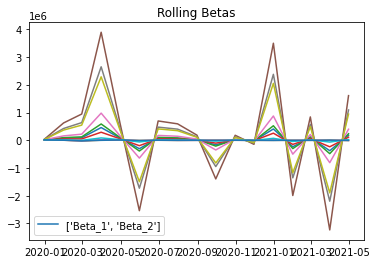

In [256]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Ethereum

In [260]:
variables1=pd.DataFrame(ts[['ETH=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['ETH=']

In [262]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

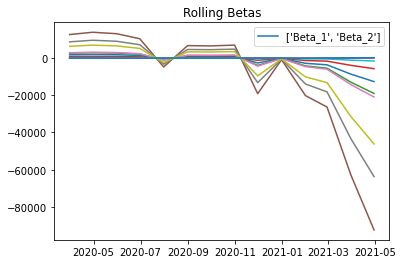

In [271]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Litecoin

In [ ]:
variables1=pd.DataFrame(ts[['LTC=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['LTC=']

In [263]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

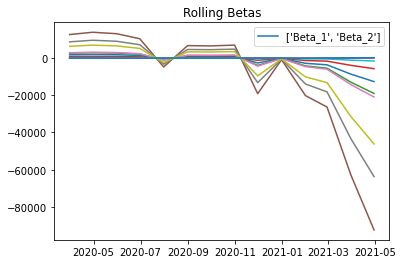

In [272]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Ripple

In [ ]:
variables1=pd.DataFrame(ts[['XRP=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['XRP=']

In [264]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

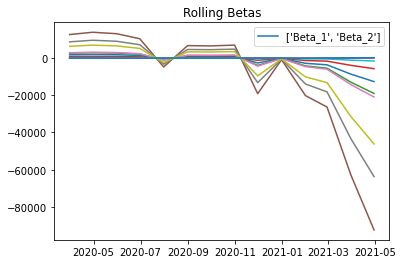

In [273]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show


### Rolling window regression - Bitcoin cash

In [ ]:
variables1=pd.DataFrame(ts[['BCH=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['BCH=']

In [265]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

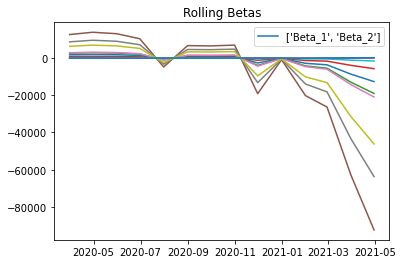

In [274]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Swiss Franc

In [ ]:
variables1=pd.DataFrame(ts[['CHF=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['CHF=']

In [266]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

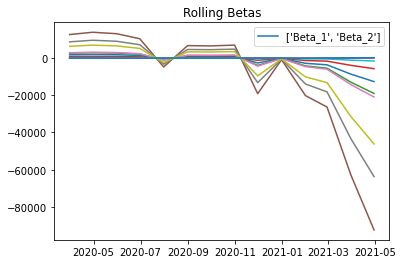

In [275]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Euro

In [ ]:
variables1=pd.DataFrame(ts[['EUR=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['EUR=']

In [267]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

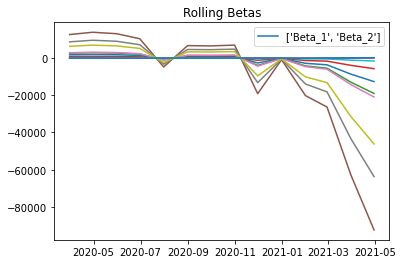

In [276]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Pound Sterling

In [ ]:
variables1=pd.DataFrame(ts[['GBP=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['GBP=']

In [268]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

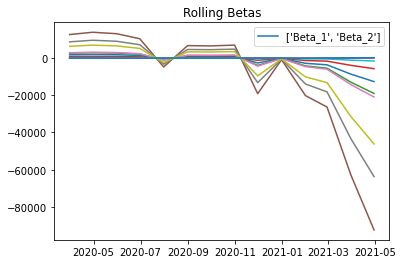

In [277]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Japanese Yen

In [ ]:
variables1=pd.DataFrame(ts[['JPY=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['JPY=']

In [269]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

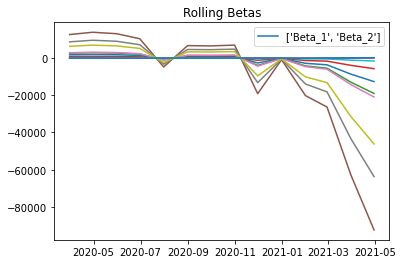

In [278]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show

### Rolling window regression - Yuan

In [ ]:
variables1=pd.DataFrame(ts[['CNY=','XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX']])
variables1['const']=1
X=variables1 [['XAU=','XAG=','XPD=','XPT=','LCOc1','.SSHI','.SP500','.NDX','.FTSE','.DJX','const']]
Y=variables1 ['CNY=']

In [270]:
rolling_ols = rolling_regression(Y,X,13)
rolling_ols=pd.DataFrame.from_dict(dict(zip(rolling_ols.index, rolling_ols.values))).T
rolling_ols.columns=["Beta_1","Beta_2","Beta_3","Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11",]
rolling_ols.head()

,Beta_1,Beta_2,Beta_3,Beta_4,Beta_5,Beta_6,Beta_7,Beta_8,Beta_9,Beta_10,Beta_11
2020-03-31,1754.716546,12.966507,2627.750463,805.154936,22.776631,12659.379652,2888.463512,8737.521401,6341.995394,242.503273,-1.541738
2020-04-30,1928.091095,16.554245,2886.228869,885.965665,27.320666,13895.747136,3172.356379,9591.583850,6962.540567,268.466389,0.631728
2020-05-31,1800.947370,-5.135298,2706.227342,816.313107,5.037169,13108.381044,2976.569992,9041.666500,6557.660238,232.879553,-20.179414
2020-06-30,1434.836801,4.045305,2152.006015,654.802556,12.104006,10392.665936,2366.173378,7170.985838,5203.138464,192.602358,-7.872750
2020-07-31,-647.496362,13.055814,-978.591204,-287.378679,9.335361,-4783.048987,-1077.465651,-3295.698940,-2387.204677,-73.995145,18.558011


<function matplotlib.pyplot.show(*args, **kw)>

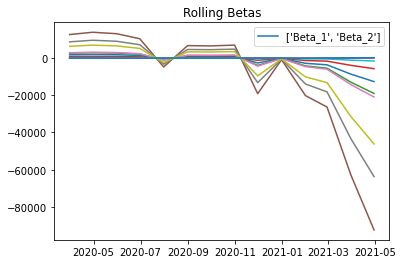

In [279]:
plt.plot(rolling_ols[['Beta_1','Beta_2','Beta_3',"Beta_4","Beta_5","Beta_6","Beta_7","Beta_8","Beta_9","Beta_10","Beta_11"]])
labels=[['Beta_1','Beta_2']]
plt.legend(labels)
plt.title('Rolling Betas')
plt.show